# Project5 - Credit Card Users Churn Prediction

## Problem statement

* The Thera bank recently saw a steep decline in the number of users of their credit card, and credit cards are a good source of income for banks
* The bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason.
* Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.

## Objective

* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not
* Optimize the model using appropriate techniques
* Generate a set of insights and recommendations that will help the bank

## Data

**BankChurners.csv**

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## Loading libraries

In [1]:
import sklearn

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale value
from sklearn.preprocessing import MinMaxScaler

# To tune model, get different metric scores and split data
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    make_scorer,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

# To impute missing values
from sklearn.impute import KNNImputer

# To bin continuous data into intervals
from sklearn.preprocessing import KBinsDiscretizer

# To build a model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# To oversample and undersample data
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")


## Loading and exploring the dataset

### Read the dataset.

In [3]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

raw_data = pd.read_csv("/content/drive/MyDrive/GL-AIML/Feature_selection_Model_selection_and_Tuning/Project/BankChurners.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# copying data to another varaible to avoid any changes to original data
data = raw_data.copy()

In [5]:
# checking the shape of the data
data.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns

### View the first, last and random 5 rows of the dataset.

In [6]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [7]:
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

In [8]:
data.sample(n=5, random_state=1)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College            NaN  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6498              36  ...                       3                      2   
9013              32  ...                       3                      3   
2053              31  ...                       3                      2   
3211              32  ...                       3                      4   
5559              28  ...                       2                      4   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
6498        2570.0                 2107            463.0   
9013        2609.0                 1259           1350.0   
2053        9871.0                 1061           8810.0   
3211       34516.0                 2517          31999.0   
5559        1614.0                    0           1614.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498                 0.651             4058              83   
9013                 0.871             8677              96   
2053                 0.545             1683              34   
3211                 0.765             4228              83   
5559                 0.609             2437              46   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
6498                0.766                  0.820  
9013                0.627                  0.483  
2053                0.478                  0.107  
3211                0.596                  0.073  
5559                0.438                  0.000  

[5 rows x 21 columns]

### Check duplicates.

In [9]:
data.duplicated().sum()

0

In [10]:
# check dupilcates without CLIENTNUM
data.drop(["CLIENTNUM"], axis=1).duplicated().sum()  ## no data change

0

* No duplicate was found.


### Check the data types of the columns for the dataset.

In [11]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:
# List-up columns with NaN
data.columns[data.isna().any()].tolist()

['Education_Level', 'Marital_Status']

* `Education_Level` and `Marital_Status` columns have missing values

In [13]:
# check rows with missing values
data[data.isnull().any(axis=1)]

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
3      769911858  Existing Customer            40      F                4   
6      810347208  Existing Customer            51      M                4   
7      818906208  Existing Customer            32      M                0   
10     708790833  Existing Customer            42      M                5   
11     710821833  Existing Customer            65      M                1   
...          ...                ...           ...    ...              ...   
10100  719848008  Existing Customer            39      M                2   
10101  718372458  Existing Customer            42      M                2   
10118  713755458  Attrited Customer            50      M                1   
10123  710638233  Attrited Customer            41      M                2   
10125  717406983  Attrited Customer            30      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
3         High School            NaN  Less than $40K          Blue   
6                 NaN        Married         $120K +          Gold   
7         High School            NaN     $60K - $80K        Silver   
10         Uneducated            NaN         $120K +          Blue   
11                NaN        Married     $40K - $60K          Blue   
...               ...            ...             ...           ...   
10100        Graduate            NaN     $60K - $80K        Silver   
10101        Graduate            NaN     $40K - $60K          Blue   
10118             NaN            NaN    $80K - $120K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3                  34  ...                       4                      1   
6                  46  ...                       1                      3   
7                  27  ...                       2                      2   
10                 31  ...                       3                      2   
11                 54  ...                       2                      3   
...               ...  ...                     ...                    ...   
10100              36  ...                       2                      2   
10101              30  ...                       2                      5   
10118              36  ...                       3                      4   
10123              25  ...                       2                      3   
10125              36  ...                       3                      3   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3            3313.0                 2517            796.0   
6           34516.0                 2264          32252.0   
7           29081.0                 1396          27685.0   
10           6748.0                 1467           5281.0   
11           9095.0                 1587           7508.0   
...             ...                  ...              ...   
10100       29808.0                    0          29808.0   
10101        3735.0                 1723           2012.0   
10118        9959.0                  952           9007.0   
10123        4277.0                 2186           2091.0   
10125        5281.0                    0           5281.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3                     1.405             1171              20   
6                     1.975             1330              31   
7                     2.204             1538              36   
10                    0.831             1201              42   
11                    1.433             1314              26   
...                     ...              ...             ...   
10100                 0.669            16098             128   
10101                 0.595            14501              92   
10118  

* Some missing data were found in 2154 rows, and no specific pattern was observed.

### Summary of the dataset.

In [14]:
data.describe(include="all").T

count unique                top  freq  \
CLIENTNUM                 10127.0    NaN                NaN   NaN   
Attrition_Flag              10127      2  Existing Customer  8500   
Customer_Age              10127.0    NaN                NaN   NaN   
Gender                      10127      2                  F  5358   
Dependent_count           10127.0    NaN                NaN   NaN   
Education_Level              8608      6           Graduate  3128   
Marital_Status               9378      3            Married  4687   
Income_Category             10127      6     Less than $40K  3561   
Card_Category               10127      4               Blue  9436   
Months_on_book            10127.0    NaN                NaN   NaN   
Total_Relationship_Count  10127.0    NaN                NaN   NaN   
Months_Inactive_12_mon    10127.0    NaN                NaN   NaN   
Contacts_Count_12_mon     10127.0    NaN                NaN   NaN   
Credit_Limit              10127.0    NaN                NaN   NaN   
Total_Revolving_Bal       10127.0    NaN                NaN   NaN   
Avg_Open_To_Buy           10127.0    NaN                NaN   NaN   
Total_Amt_Chng_Q4_Q1      10127.0    NaN                NaN   NaN   
Total_Trans_Amt           10127.0    NaN                NaN   NaN   
Total_Trans_Ct            10127.0    NaN                NaN   NaN   
Total_Ct_Chng_Q4_Q1       10127.0    NaN                NaN   NaN   
Avg_Utilization_Ratio     10127.0    NaN                NaN   NaN   

                                      mean              std          min  \
CLIENTNUM                 739177606.333663  36903783.450231  708082083.0   
Attrition_Flag                         NaN              NaN          NaN   
Customer_Age                      46.32596         8.016814         26.0   
Gender                                 NaN              NaN          NaN   
Dependent_count                   2.346203         1.298908          0.0   
Education_Level                        NaN              NaN          NaN   
Marital_Status                         NaN              NaN          NaN   
Income_Category                        NaN              NaN          NaN   
Card_Category                          NaN              NaN          NaN   
Months_on_book                   35.928409         7.986416         13.0   
Total_Relationship_Count           3.81258         1.554408          1.0   
Months_Inactive_12_mon            2.341167         1.010622          0.0   
Contacts_Count_12_mon             2.455317         1.106225          0.0   
Credit_Limit                   8631.953698       9088.77665       1438.3   
Total_Revolving_Bal            1162.814061       814.987335          0.0   
Avg_Open_To_Buy                7469.139637      9090.685324          3.0   
Total_Amt_Chng_Q4_Q1              0.759941         0.219207          0.0   
Total_Trans_Amt                4404.086304      3397.129254        510.0   
Total_Trans_Ct                   64.858695         23.47257         10.0   
Total_Ct_Chng_Q4_Q1               0.712222         0.238086          0.0   
Avg_Utilization_Ratio             0.274894         0.275691          0.0   

                                  25%          50%          75%          max  
CLIENTNUM                 713036770.5  717926358.0  773143533.0  828343083.0  
Attrition_Flag                    NaN          NaN          NaN          NaN  
Customer_Age                     41.0         46.0         52.0         73.0  
Gender                            NaN          NaN          NaN          NaN  
Dependent_count                   1.0          2.0          3.0          5.0  
Education_Level                   NaN          NaN          NaN          NaN  
Marital_Status                    NaN          NaN          NaN          NaN  
Income_Category                   NaN          NaN          NaN          NaN  
Card_Category                     NaN          NaN          NaN          NaN  
Months_on_book                   31.0         

In [15]:
# check unique values in categorical values
categorical_col_names = data.select_dtypes(include="object").columns.to_list()
for col_name in categorical_col_names:
    print("## %s ##" % col_name)
    print(data[col_name].value_counts())
    print("-" * 15)

## Attrition_Flag ##
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
---------------
## Gender ##
F    5358
M    4769
Name: Gender, dtype: int64
---------------
## Education_Level ##
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
---------------
## Marital_Status ##
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
---------------
## Income_Category ##
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
---------------
## Card_Category ##
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
---------------


* Missing values in columns `Education_Level` and `Marital_Status` will be replaced with "Unknown" because clearing all rows with missing values ​​causes about 20% data loss.
* Since "abc" in the `Income_Category` column is suspicious, it will be replaced with "Unknown" becauseclearing all rows with missing values ​​causes about 10% data loss.
* `Avg_Open_To_Buy` = `Credit_Limit` - `Total_Revolving_Bal`

## Data pre-processing

### Missing / suspicious value treatment

In [16]:
# replace missing value with "Unknown"
data = data.fillna("Unknown")

In [17]:
# replace "abc" value with "Unknown" in Income_Category column.
data["Income_Category"] = data["Income_Category"].apply(
    lambda x: x.replace("abc", "Unknown")
)

### Binning

#### Customer_Age

In [18]:
data[["Customer_Age"]].describe().T

count      mean       std   min   25%   50%   75%   max
Customer_Age  10127.0  46.32596  8.016814  26.0  41.0  46.0  52.0  73.0

In [19]:
data.sort_values("Customer_Age", ascending=False).head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
251  715952883  Existing Customer            73      M                0   
254  787348608  Existing Customer            70      M                0   
198  708868233  Attrited Customer            68      M                0   
151  712720158  Existing Customer            68      M                1   
432  717916758  Existing Customer            67      F                0   

    Education_Level Marital_Status Income_Category Card_Category  \
251     High School        Married     $40K - $60K          Blue   
254     High School        Married  Less than $40K          Blue   
198     High School        Married  Less than $40K          Blue   
151        Graduate        Married         Unknown          Blue   
432         Unknown        Married         Unknown          Blue   

     Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
251              36  ...                       3                      2   
254              56  ...                       2                      3   
198              52  ...                       3                      2   
151              56  ...                       2                      3   
432              56  ...                       3                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
251        4469.0                 1125           3344.0                 1.363   
254        3252.0                 1495           1757.0                 0.581   
198        1438.3                  900            538.3                 0.743   
151       13860.0                 1652          12208.0                 1.255   
432       10509.0                 2388           8121.0                 0.777   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
251             1765              34                1.615   
254             1227              15                0.875   
198              760              21                0.615   
151             1910              32                1.909   
432             1365              34                1.429   

     Avg_Utilization_Ratio  
251                  0.252  
254                  0.460  
198                  0.626  
151                  0.119  
432                  0.227  

[5 rows x 21 columns]

In [20]:
## Binning Customer_Age for EDA
data["Customer_Age_bin"] = pd.cut(
    data["Customer_Age"],
    bins=[26, 29, 39, 49, 59, 73],
    labels=["Under30", "30-39", "40-49", "50-59", "Above60"],
)

#### Total_Revolving_Bal

In [21]:
data[["Total_Revolving_Bal"]].describe().T

count         mean         std  min    25%     50%  \
Total_Revolving_Bal  10127.0  1162.814061  814.987335  0.0  359.0  1276.0   

                        75%     max  
Total_Revolving_Bal  1784.0  2517.0

In [22]:
## Binning Total_Revolving_Bal for EDA
data["Total_Revolving_Bal_bin"] = pd.cut(
    data["Total_Revolving_Bal"],
    bins=[-1, 500, 1000, 1500, 2000, 3000],
    labels=["<500", "500-1000", "1000-1500", "1500-2000", ">2000"],
)

## EDA - Univariate analysis

### Functions

In [23]:
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """

  show histogram & boxplot at once

  data : dataframe
  feature : column name
  figsize ; figure size (default (12,7))
  kde : whether to show density curve ( default false )
  bins : bin numbers ( default None)

  """

    fs, (ax_box, ax_hist) = plt.subplots(
        nrows=2, sharex=True, figsize=(12, 7), gridspec_kw={"height_ratios": (0.3, 0.7)}
    )
    sns.boxplot(data=data, ax=ax_box, x=feature, showmeans=True, color="violet")
    if bins:
        sns.histplot(data=data, ax=ax_hist, x=feature, bins=bins, kde=kde)
    else:
        sns.histplot(data=data, ax=ax_hist, x=feature, kde=kde)
    ax_hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  ## draw a green dotted line of mean
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  ## draw a black straight line of median
    plt.show()

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, rotation=90):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=rotation, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on  Attrition_Flag

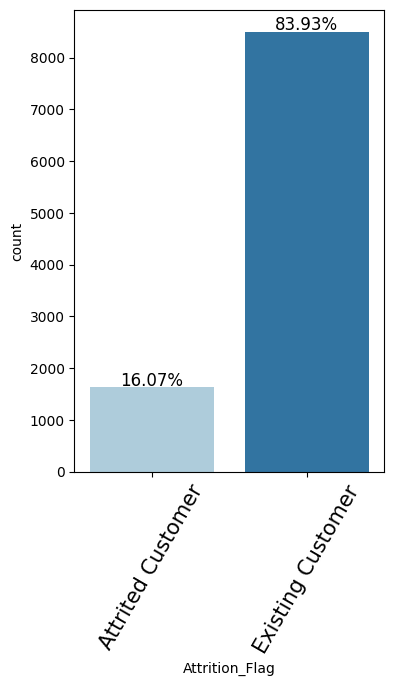

In [25]:
labeled_barplot(data, "Attrition_Flag", perc=True, rotation=60)

* It was observed that about 16% of customers churn.
* The target class is imbalanced.

### Observations on Customer_Age

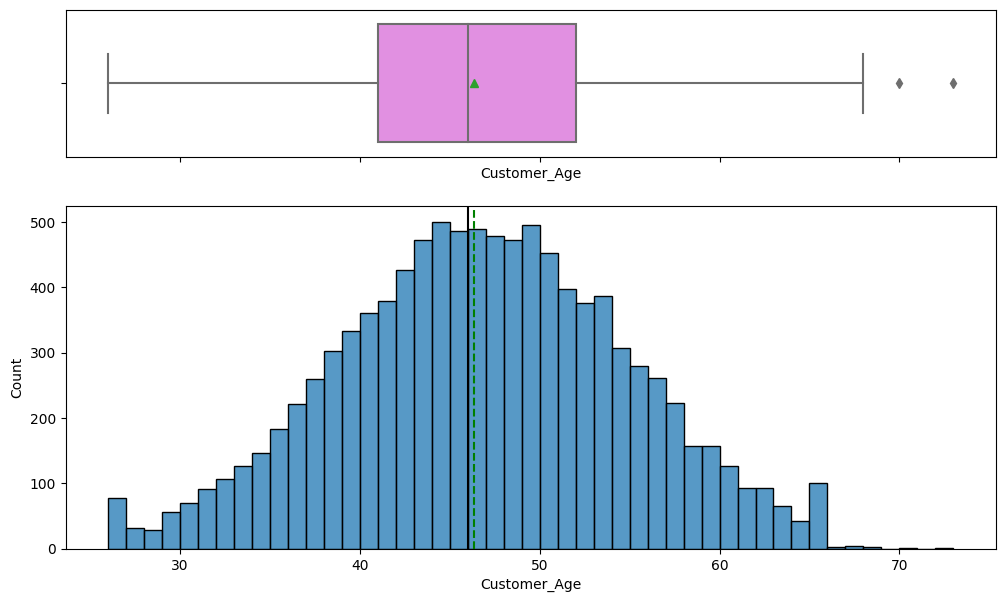

In [26]:
hist_box(data, "Customer_Age")

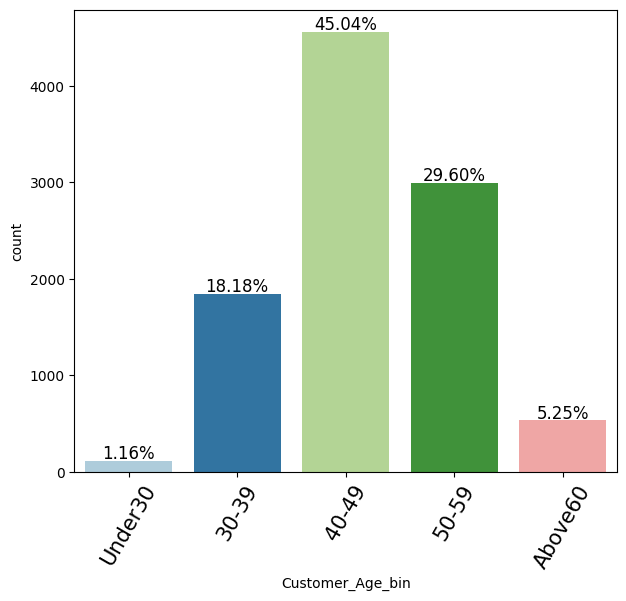

In [27]:
labeled_barplot(data, "Customer_Age_bin", perc=True, rotation=60)

* The customer's age is normally distributed with a median value of 46.
* It shows a variety of age groups from 20's to 70's.
* 46% of customers are in their 40s, followed by those in their 50s and 30s.

### Observations on Gender

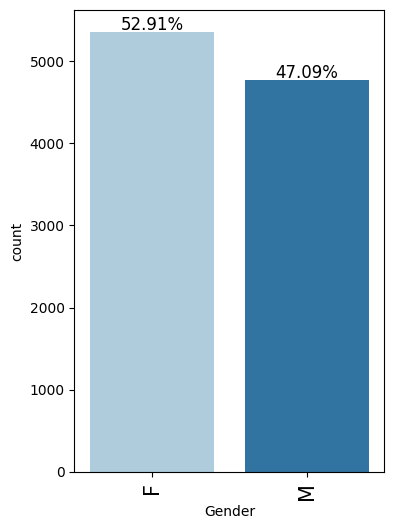

In [28]:
labeled_barplot(data, "Gender", perc=True)

* Although there are more male customers than female customers, there is no significant difference in the number.

### Observations on Dependent_count

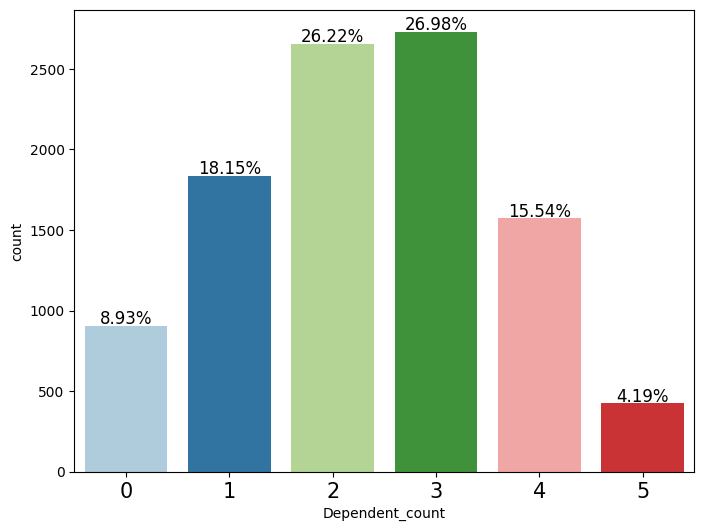

In [29]:
labeled_barplot(data, "Dependent_count", perc=True, rotation=0)

* Customers had the largest number of dependents of 3 (26.98%), followed by customers with 2(26.22%) and 1(18.15%).
* The number of customers with 5 dependents was the lowest.

### Observations on Education_Level

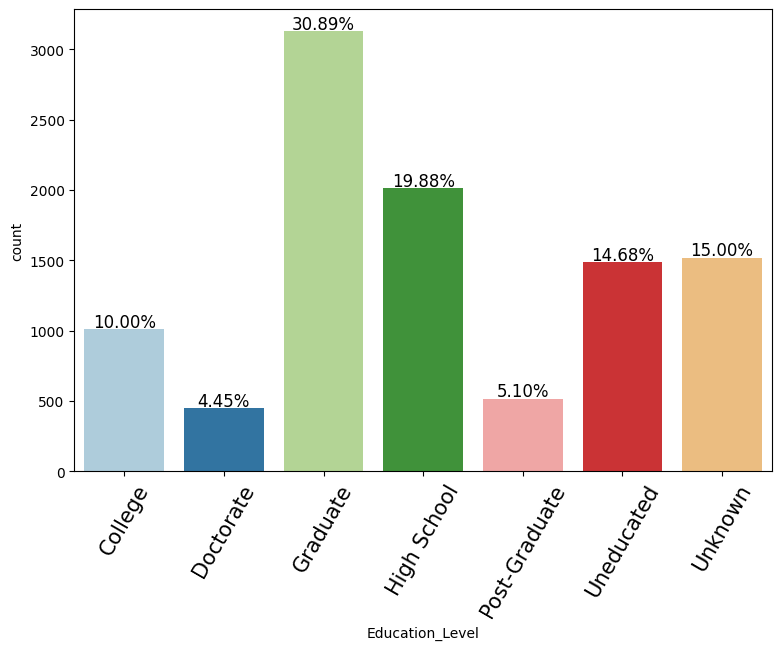

In [30]:
labeled_barplot(data, "Education_Level", perc=True, rotation=60)

* Among the customers, university graduates accounted for the most at about 30%, and those with doctoral degrees accounted for the least at 4.5%.

### Observations on Marital_Status

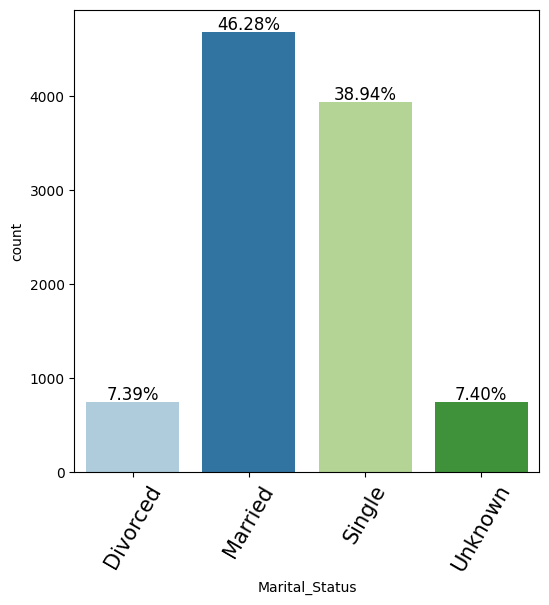

In [31]:
labeled_barplot(data, "Marital_Status", perc=True, rotation=60)

* Among the customers, most were married customers(46.28%), followed by sigle customers(38.94%).

### Observations on Income_Category

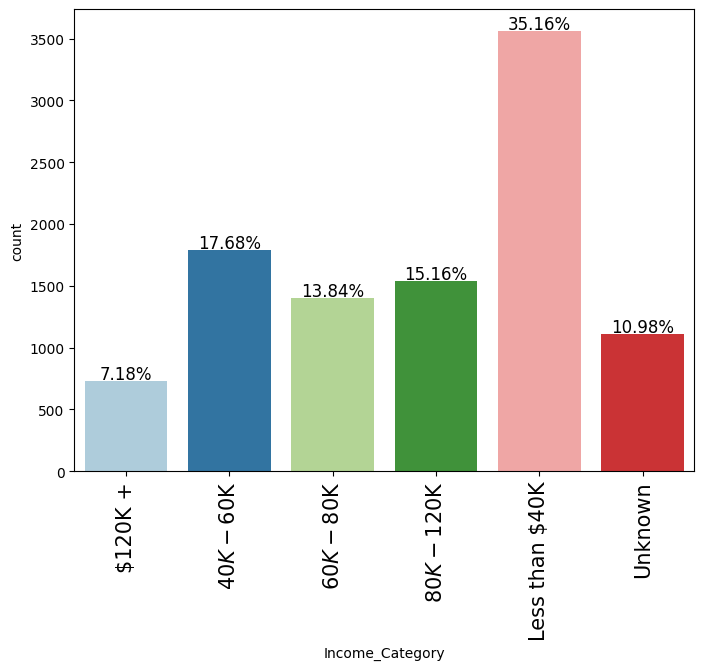

In [32]:
labeled_barplot(data, "Income_Category", perc=True)

* The largest number of customers were those with an annual income of less than 40K(35.16%), and the lowest were those with an annual income of more than 120K(7.18%).
* Data with "abc" value in `Income_Category` column is 10.98%.

### Observations on Card_Category

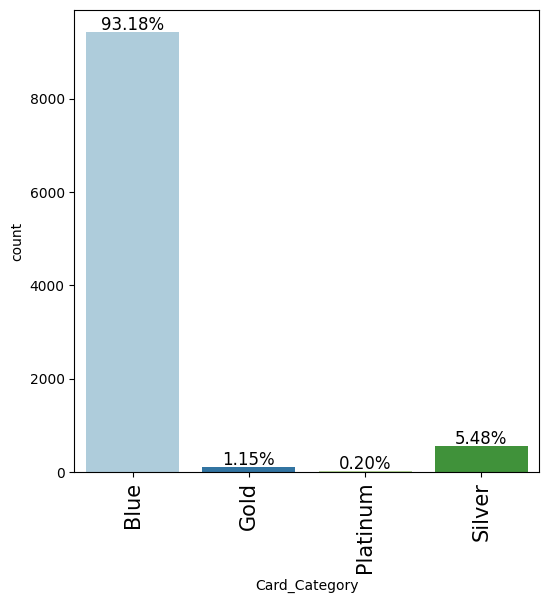

In [33]:
labeled_barplot(data, "Card_Category", perc=True)

* Over 93% of customers own "Blue" cards and only 0.2% of customers own "Platinum" cards.

### Observations on Months_on_book

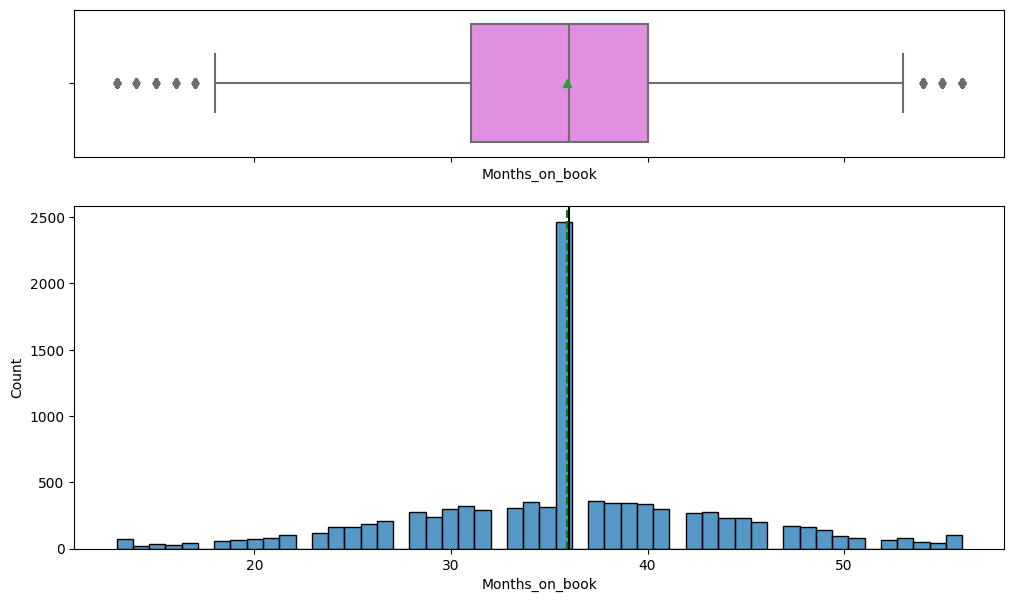

In [34]:
hist_box(data, "Months_on_book")

* The median value of the `Months_on_book` column was 36
* A peculiar distribution was observed, with the median accounting for about 1/4 of the total.
* Some outliers were observed outside the lower and upper whiskers.


### Observations on Total_Relationship_Count

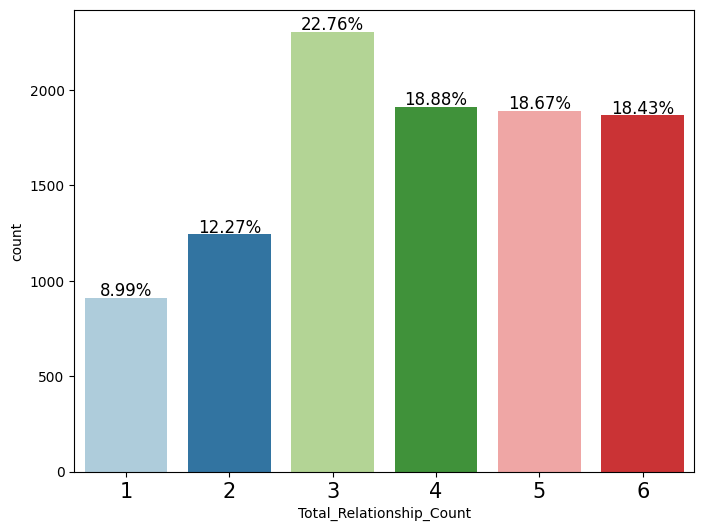

In [35]:
labeled_barplot(data, "Total_Relationship_Count", perc=True, rotation=0)

* The number of products held by customers varied from one to six.
* The largest number of customers (22.76%) had three products and the fewest (8.99%) had one product.


### Observations on Months_Inactive_12_mon

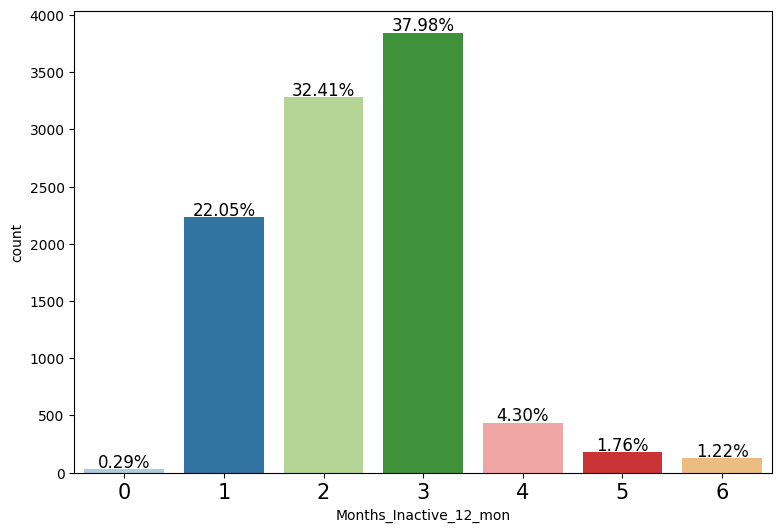

In [36]:
labeled_barplot(data, "Months_Inactive_12_mon", perc=True, rotation=0)

* In the last 12 months, the largest number of customers were inactive for 3 months (37.98%), followed by customers who were inactive for 2 months (32.41%) and 1 month (22.05%).


### Observations on Contacts_Count_12_mon

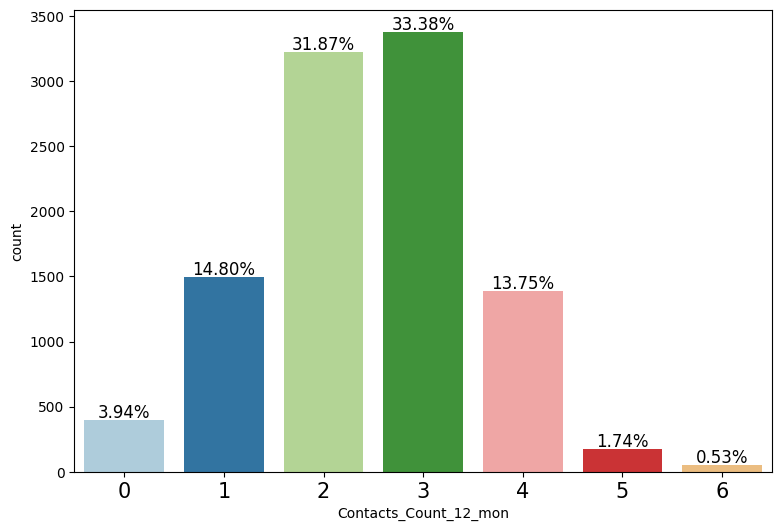

In [37]:
labeled_barplot(data, "Contacts_Count_12_mon", perc=True, rotation=0)

* In the last 12 months, the largest number of customers contacted the bank 3 times(33.38%), followed by customers contacted the bank 2 times (31.87%) and 1 time(14.8%).


### Observations on Credit_Limit

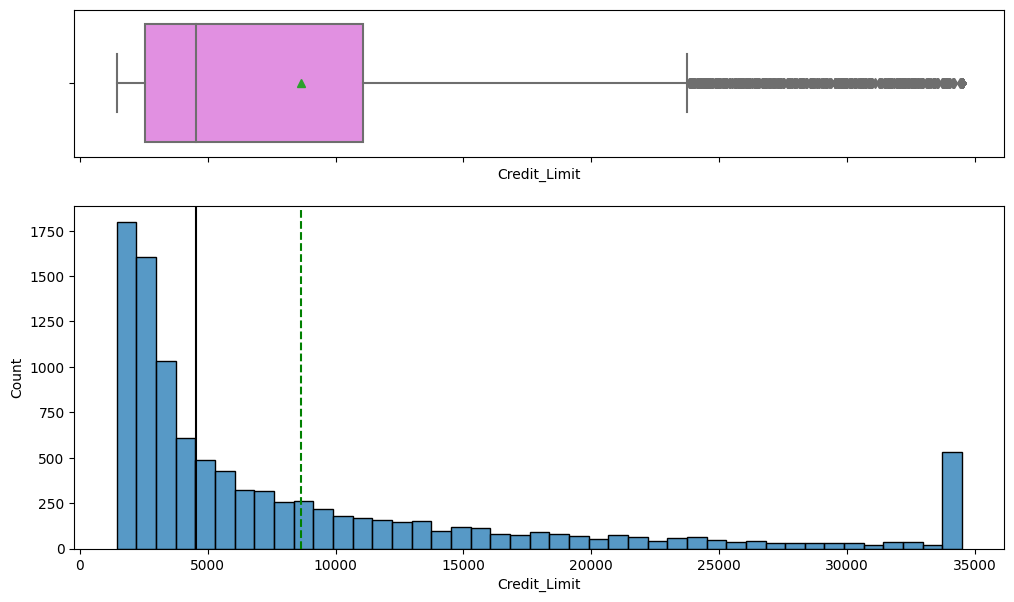

In [38]:
hist_box(data, "Credit_Limit")

* Various `Credit_Limit` ranges were observed and many outliers outside the upper whisker were observed.
* A highly right-skewed distribution was observed.

### Observations on Total_Revolving_Bal

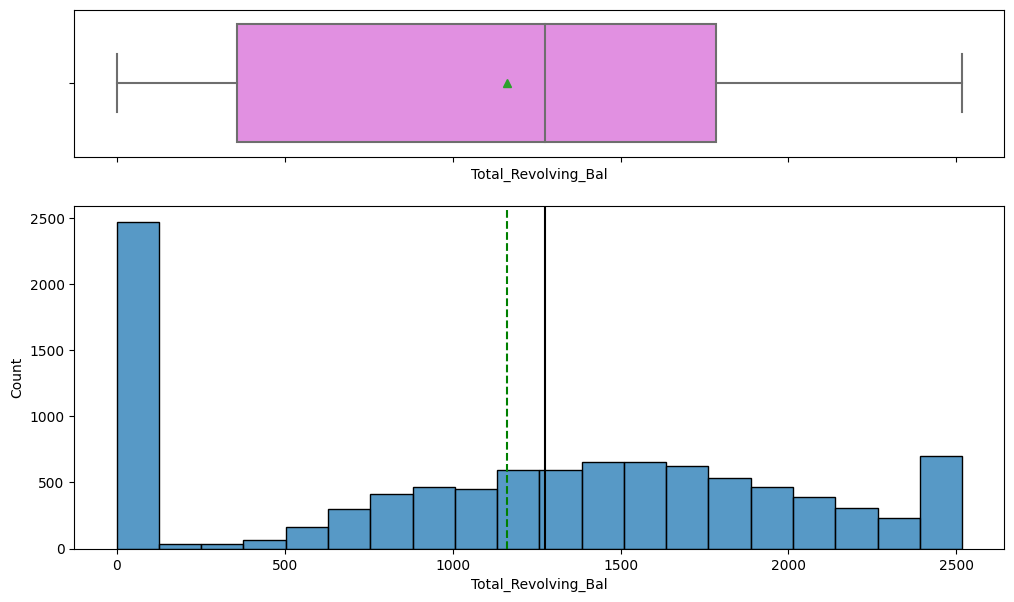

In [39]:
hist_box(data, "Total_Revolving_Bal")

* In most cases, the revolving balance is 0, but it is generally evenly distributed.

### Observations on Avg_Open_To_Buy

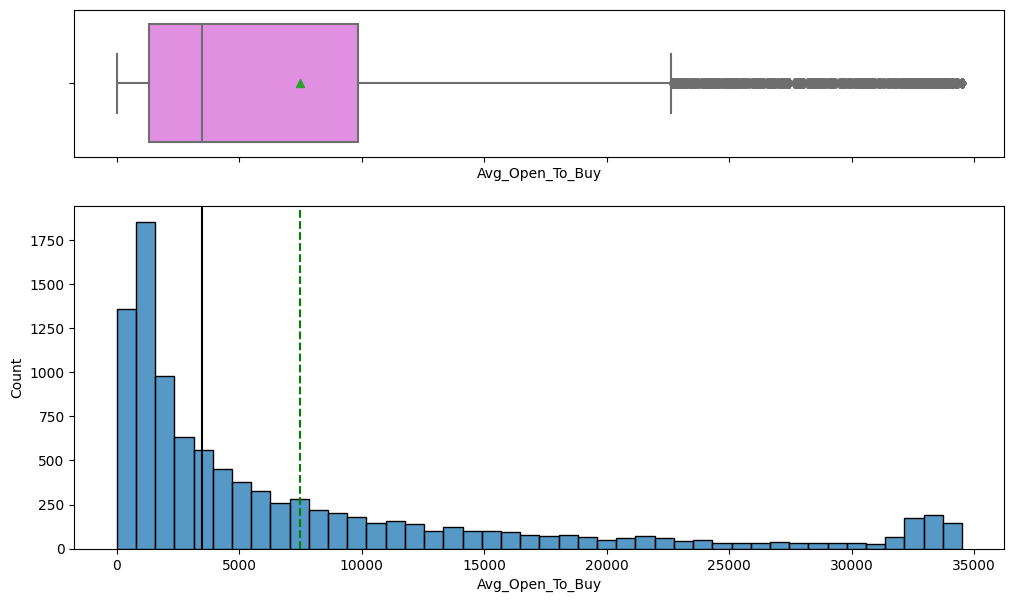

In [40]:
hist_box(data, "Avg_Open_To_Buy")

* Various `Avg_Open_To_Buy` ranges were observed and many outliers outside the upper whisker were observed.
* A highly right-skewed distribution was observed.

### Observations on Total_Trans_Amt

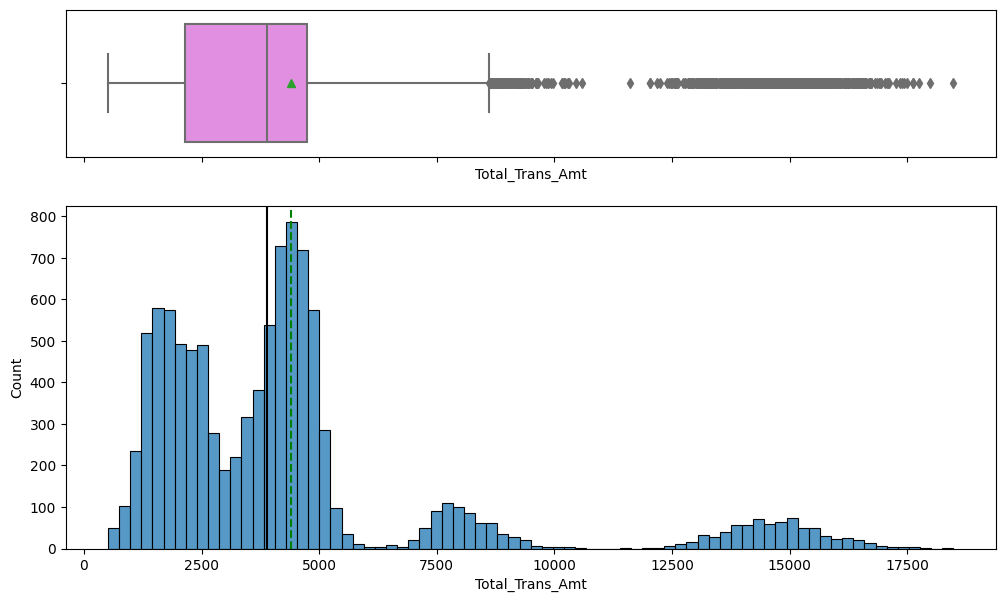

In [41]:
hist_box(data, "Total_Trans_Amt")

* Many outliers were observed outside upper whisker.
* A multimodal distribution was observed clearly. ( expectively 4 groups )

### Observations on Total_Trans_Ct

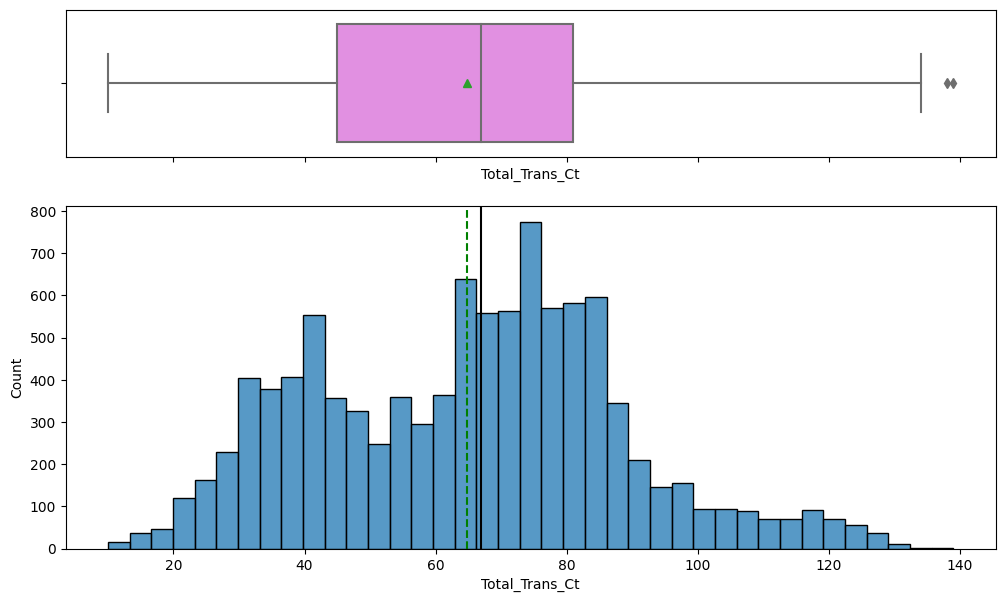

In [42]:
hist_box(data, "Total_Trans_Ct")

* A few outliers were observed.
* A multimodal distribution was observed. (expectively 2~3 groups)

### Observations on Total_Amt_Chng_Q4_Q1

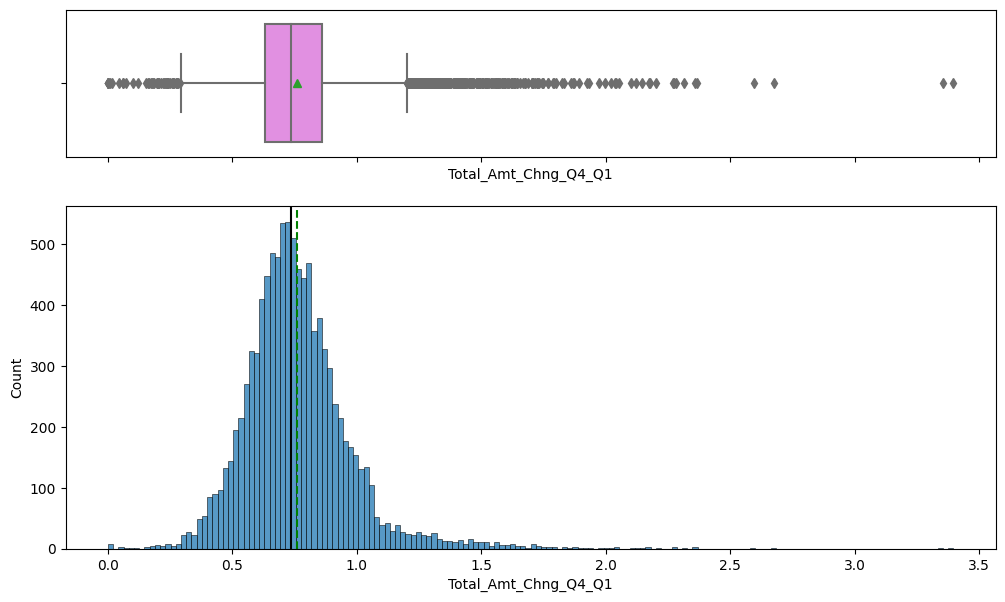

In [43]:
hist_box(data, "Total_Amt_Chng_Q4_Q1")

* The median value of the `Total_Amt_Chng_Q4_Q1` column was about 0.73.
* A normal distribution was observed with many outliers outside the lower and upper whiskers.

### Observations on Total_Ct_Chng_Q4_Q1

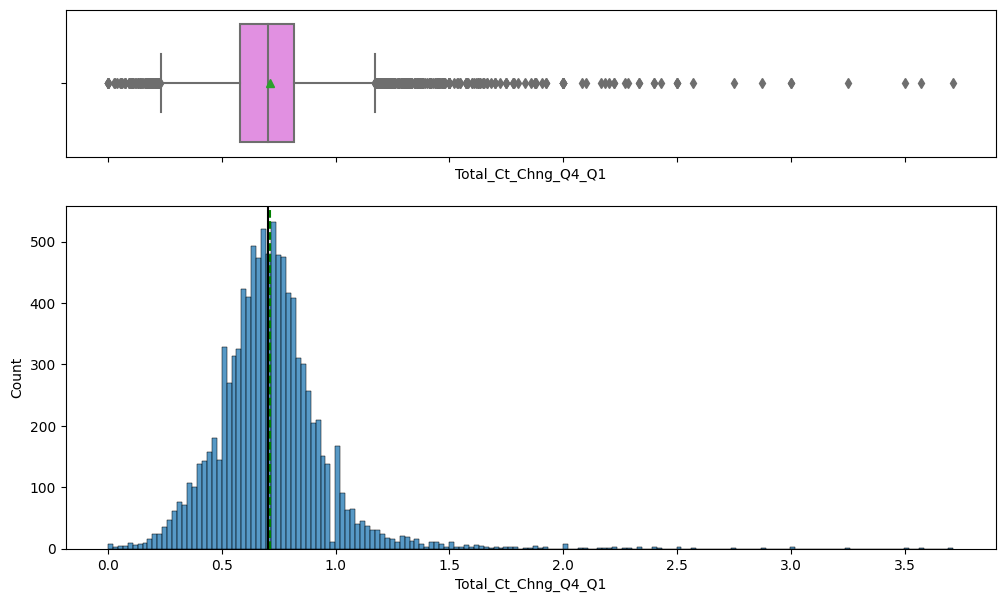

In [44]:
hist_box(data, "Total_Ct_Chng_Q4_Q1")

* The median value of the `Total_Ct_Chng_Q4_Q1` column was about 0.7.
* A normal distribution was observed with many outliers outside the lower and upper whiskers.

### Observations on Avg_Utilization_Ratio

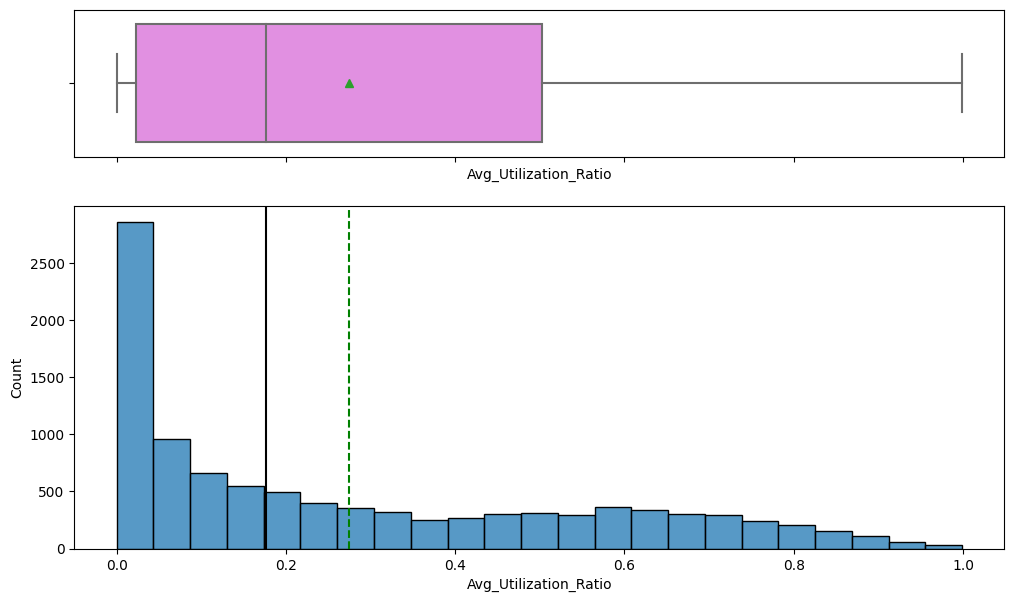

In [45]:
hist_box(data, "Avg_Utilization_Ratio")

* A highly right-skewed distribution was observed.

## EDA - Bivariate analysis

### Functions

In [46]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [47]:
# function to plot stacked bar chart
def stacked_barplot(
    data,
    predictor,
    target,
    legend=True,
    annot=False,
    rotation=0,
    xticksize=11,
    xlabsize=13,
):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    legend : show on/off legend
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))

    if legend == True:
        plt.legend(
            loc="lower left", frameon=False,
        )
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    elif legend == False:
        plt.legend([], [], frameon=False)
    plt.xticks(rotation=rotation, fontsize=xticksize)
    ax.set_xlabel(ax.get_xlabel(), size=xlabsize)
    plt.show()

### Pairplot

In [48]:
sns.pairplot(data, hue="Attrition_Flag")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Correlation heatmap

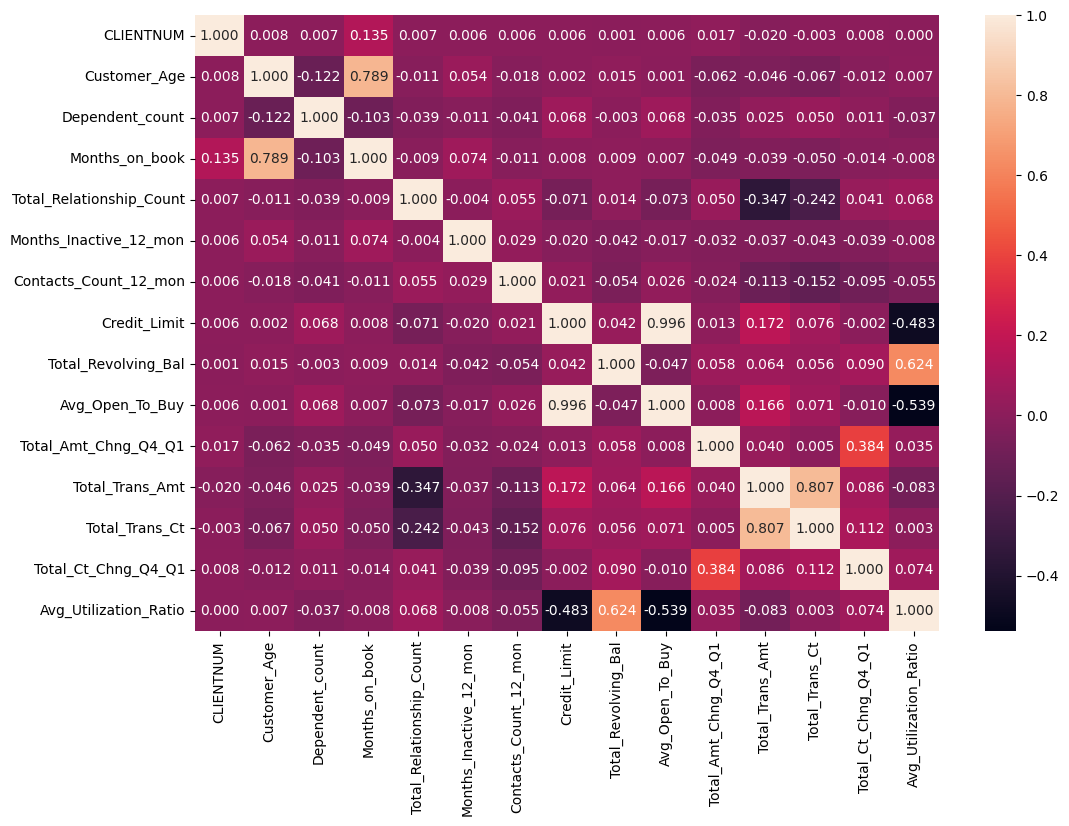

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".3f")
plt.show()

* `Total_Trans_Amt` and `Total_Trans_Ct` show a strong positivie correlation ( Correlation = 0.807 )
* `Customer_Age` and `Months_on_book` show a strong positive correlation. ( Correlation = 0.789 )
* `Total_Revolving_Bal` and `Avg_Utilization_Ratio` show a positive correlation. ( Correlation = 0.624 )
* `Credit_Limit` and `Avg_Open_To_Buy` are almost dependent each other. ( Correlation = 0.996 )
* `Avg_Utilization_Ratio` and `Avg_Open_To_Buy` show a negative correlation. ( Correlation = -0.539 )
* `Total_Trans_Amt` and `Total_Relationship_Count` show a negative correlation. ( Correlation = -0.347 )

### Attrition_Flag vs Customer_Age

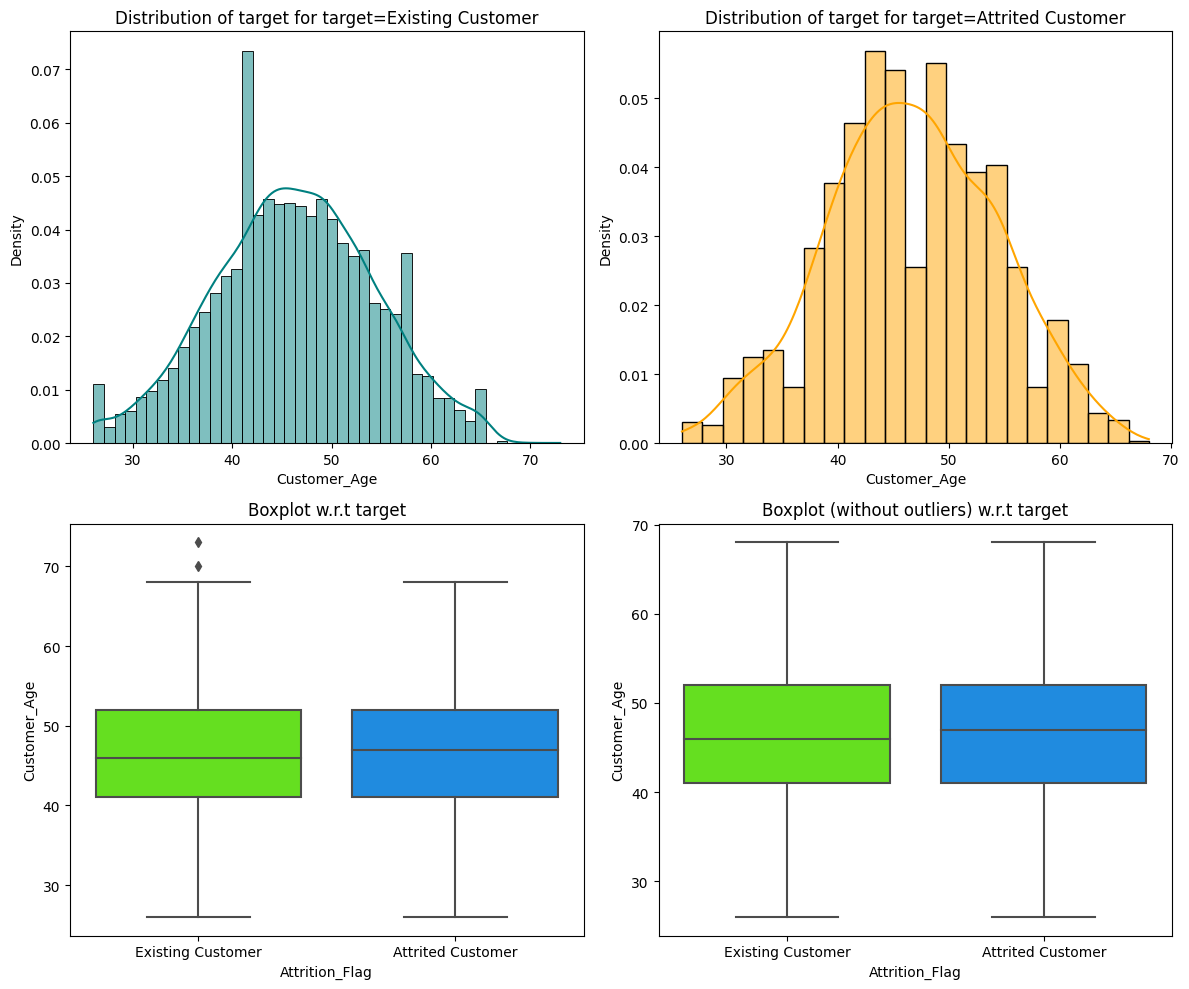

In [50]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

Attrition_Flag    Attrited Customer  Existing Customer    All
Customer_Age_bin                                             
All                            1621               8428  10049
40-49                           772               3789   4561
50-59                           506               2492   2998
30-39                           261               1580   1841
Above60                          71                461    532
Under30                          11                106    117
------------------------------------------------------------------------------------------------------------------------


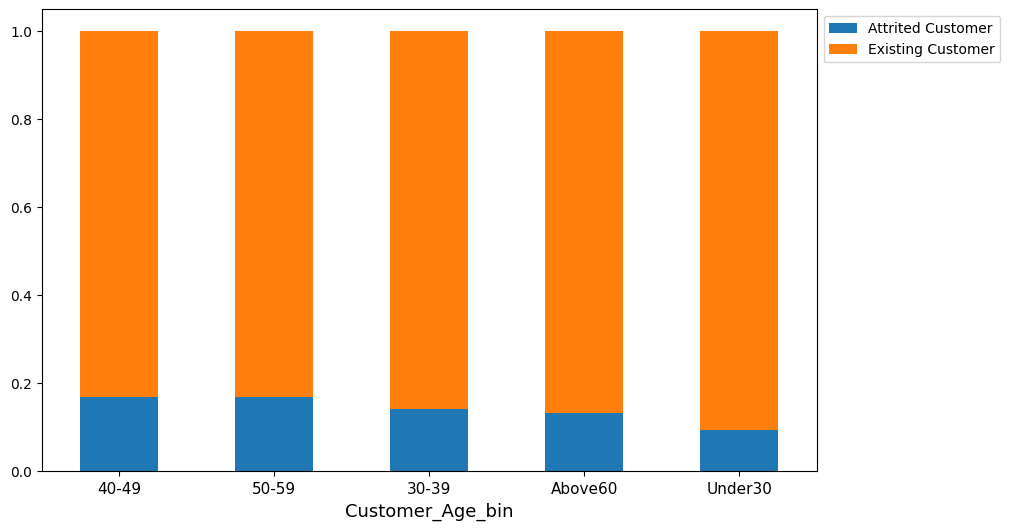

In [51]:
stacked_barplot(data, "Customer_Age_bin", "Attrition_Flag")

* Customers in their 20s had the highest rate of maintaining services, and those in their 40s had the highest rate of churn.

### Attrition_Flag vs Gender

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


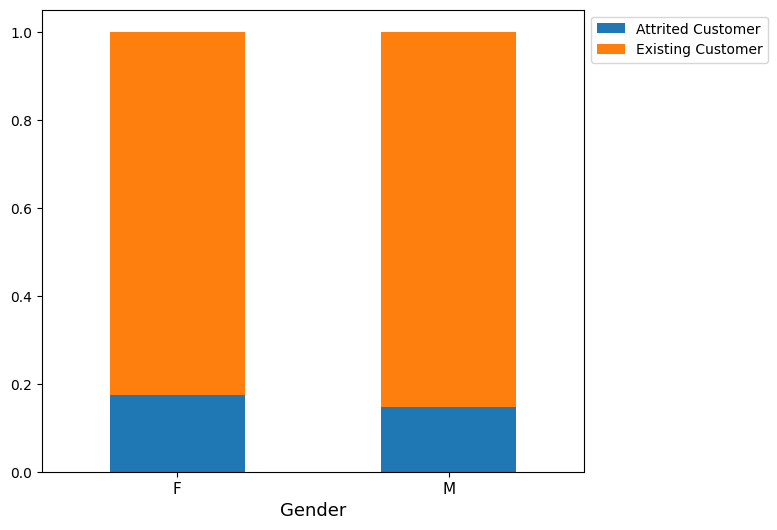

In [52]:
stacked_barplot(data, "Gender", "Attrition_Flag")

* Although the churn rate for female customers was slightly higher than for male customers, there was no significant difference.


### Attrition_Flag vs Dependent_count

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


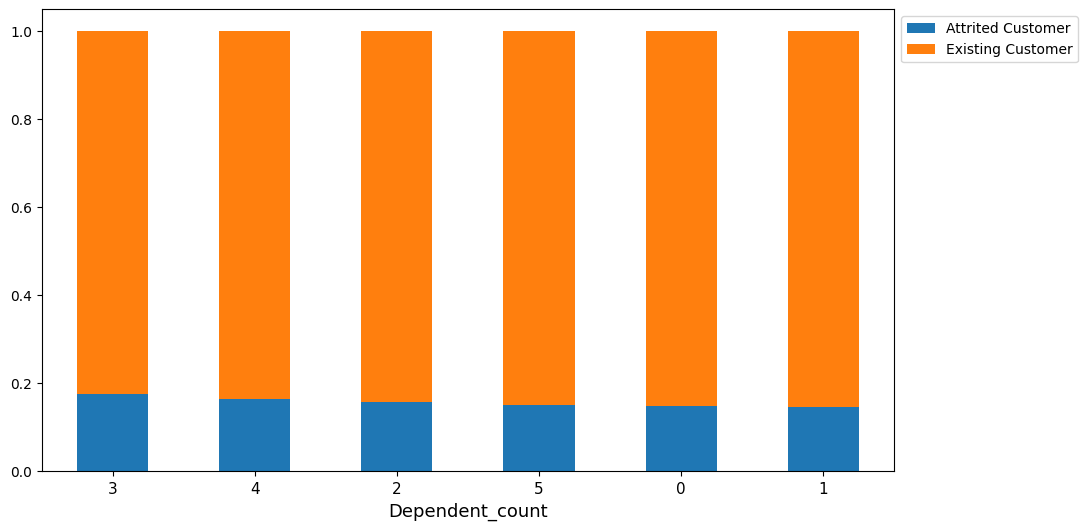

In [53]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

* The churn rate of customers was not significantly affected by the number of dependents.

### Attrition_Flag vs Education_Level

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
All                           1627               8500  10127
Graduate                       487               2641   3128
High School                    306               1707   2013
Unknown                        256               1263   1519
Uneducated                     237               1250   1487
College                        154                859   1013
Doctorate                       95                356    451
Post-Graduate                   92                424    516
------------------------------------------------------------------------------------------------------------------------


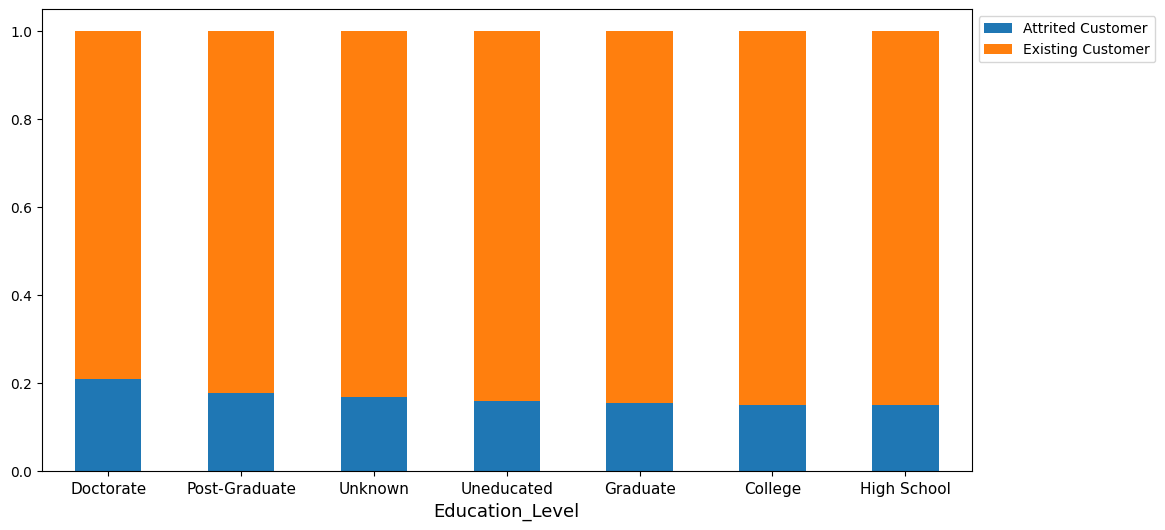

In [54]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

* Doctorate education groups have higher churn than other educational backgrounds.

### Attrition_Flag vs Marital_Status

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
All                          1627               8500  10127
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
Divorced                      121                627    748
------------------------------------------------------------------------------------------------------------------------


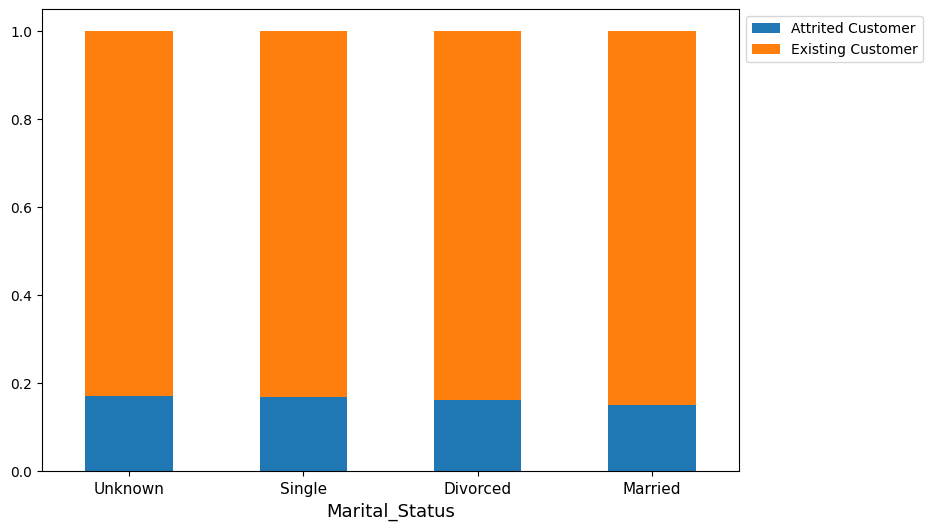

In [55]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

* Single customers have slightly higher churn than married customers, but there is no significant difference.


### Attrition_Flag vs Income_Category

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
Unknown                        187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


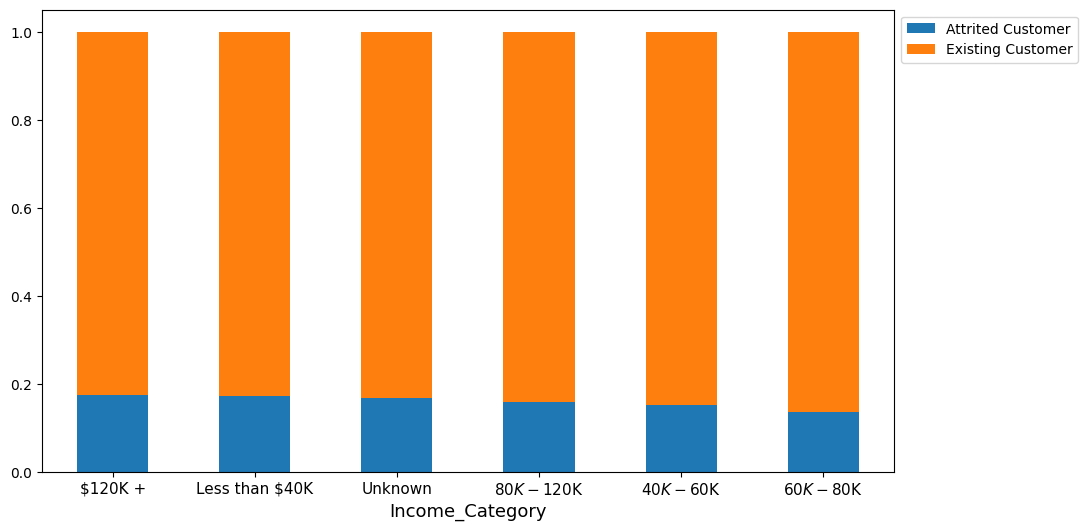

In [56]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

* The churn rate of customers with an annual salary of 120K or more and less than 40K is higher than that of other groups.

### Attrition_Flag vs Card_Category

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


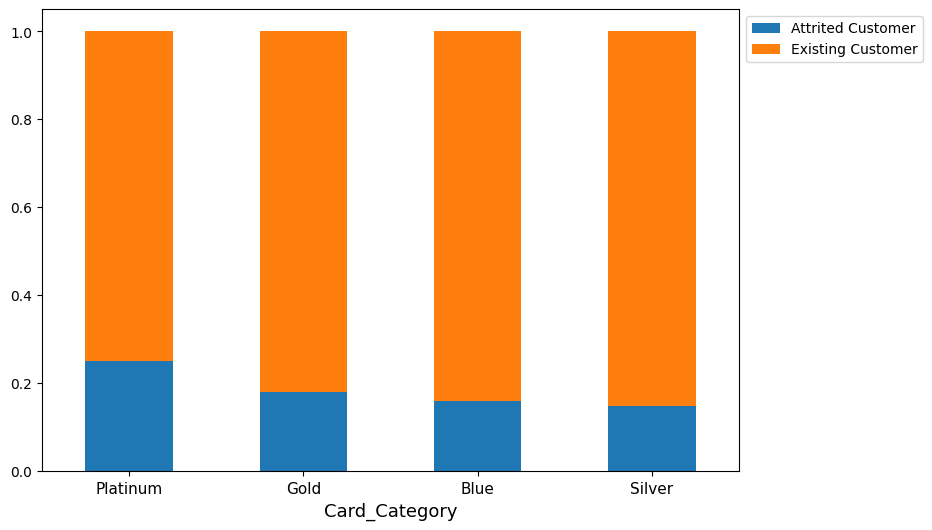

In [57]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

* Customers with "Platinum" cards have the highest churn rate and those with "Silver" cards have the lowest churn rate.

### Attrition_Flag vs Months_on_book

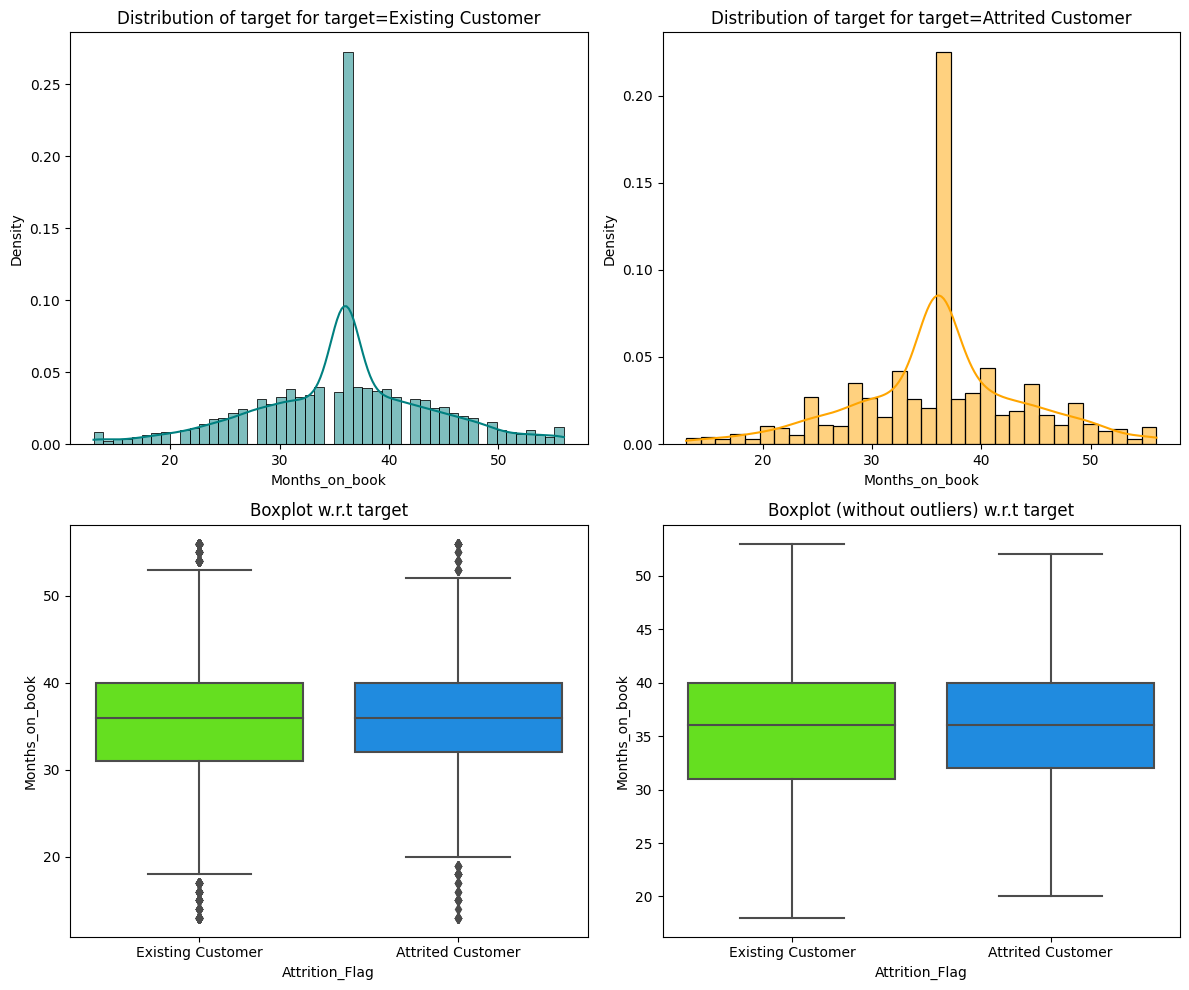

In [58]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

* Period of relationship with the bank does not significantly affect customer churn.
* It seems that a certain value has already been imputated with the median value in the given data.

### Attrition_Flag vs Total_Relationship_Count

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


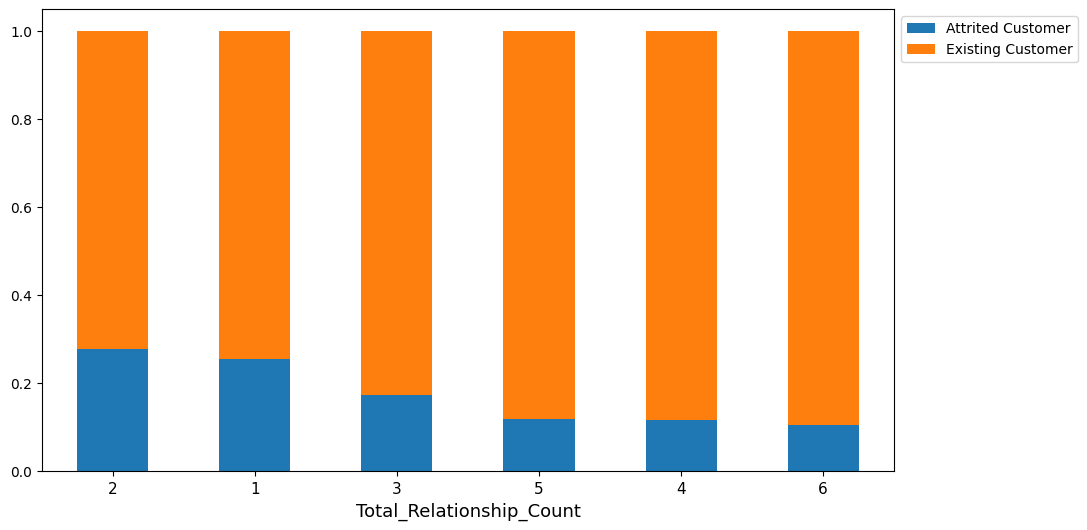

In [59]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

* As the number of products held by customers decreased, a tendency was observed to have a higher churn rate.

### Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


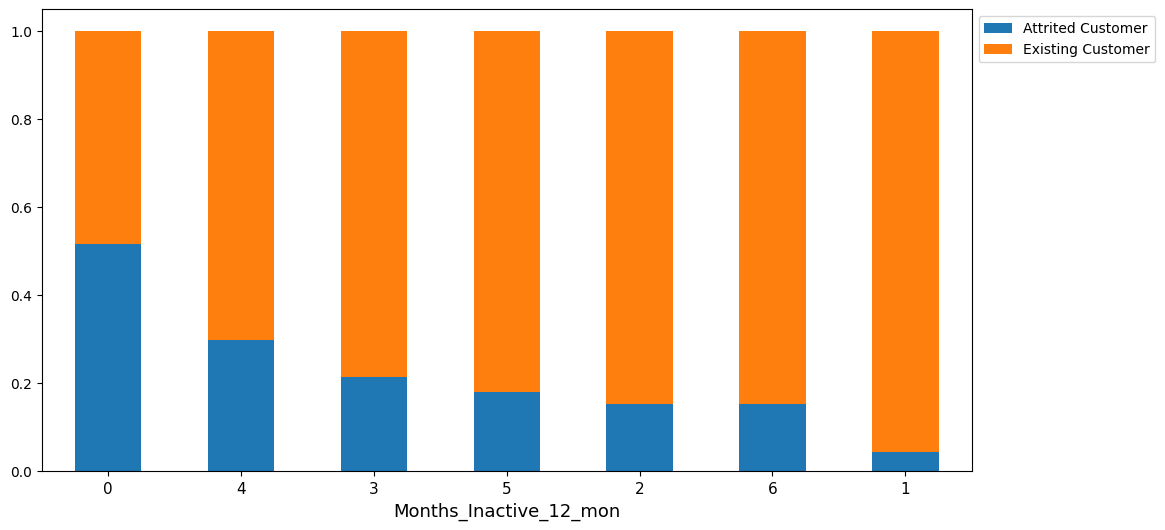

In [60]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

* Interestingly, the churn rate of customers with an inactive period of less than 1 month was the highest at about 50%, and the churn rate of customers with an inactive period of 1 month was the lowest.
* This may mean that customer churn occurred quickly as it was close to the time when data collection occurred.

### Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


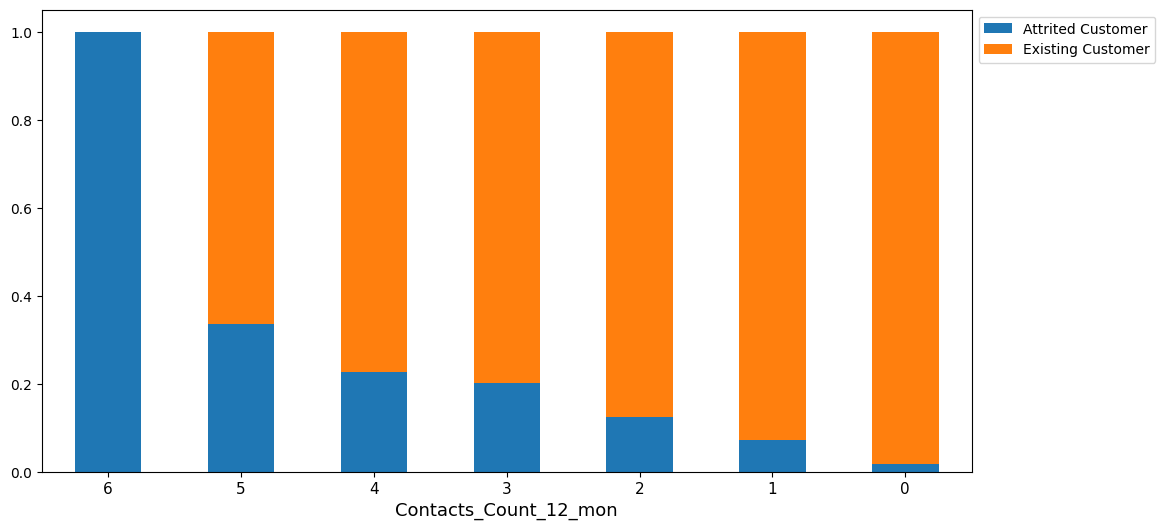

In [61]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

* The higher the number of customer contacts, the higher the churn rate, and all customers who had contacted 6 times left without exception.

### Attrition_Flag vs Credit_Limit

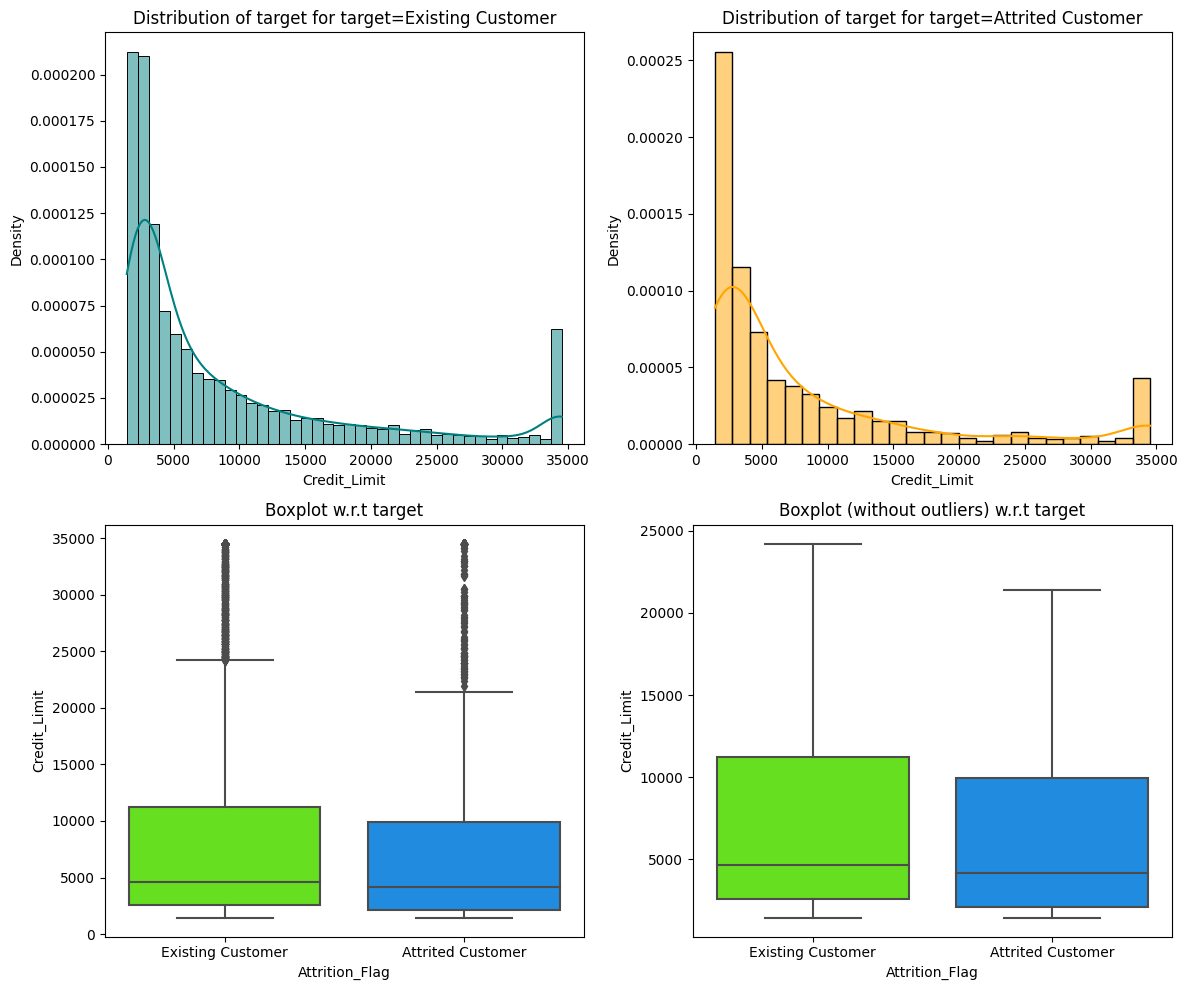

In [62]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

### Attrition_Flag vs Total_Revolving_Bal

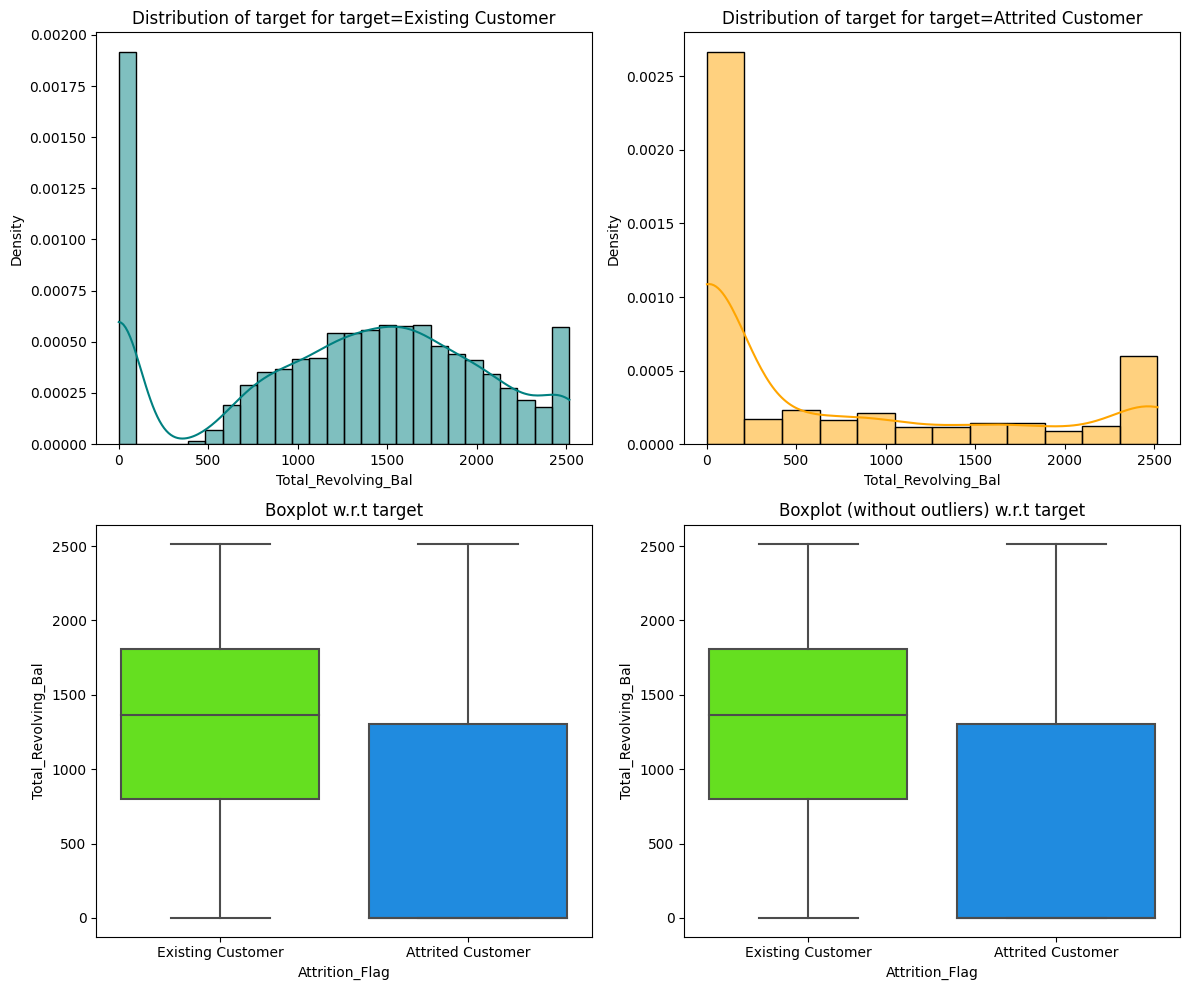

In [63]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

* The revolving balance of customers who did not leave was relatively high.

### Attrition_Flag vs Total_Trans_Amt

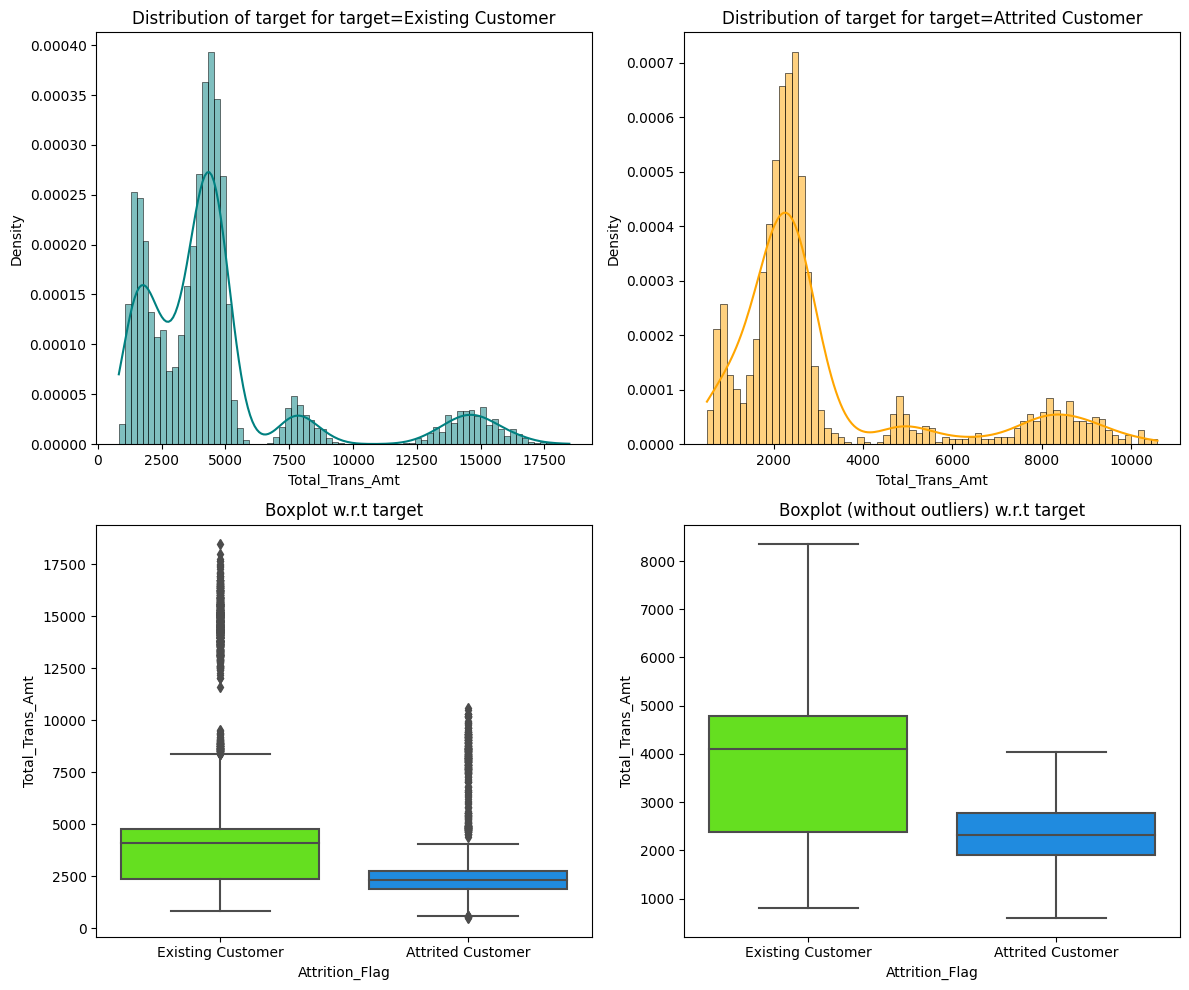

In [64]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

* Naturally, the card transaction amount of churning customers is lower than the count of existing customers.

### Attrition_Flag vs Total_Trans_Ct

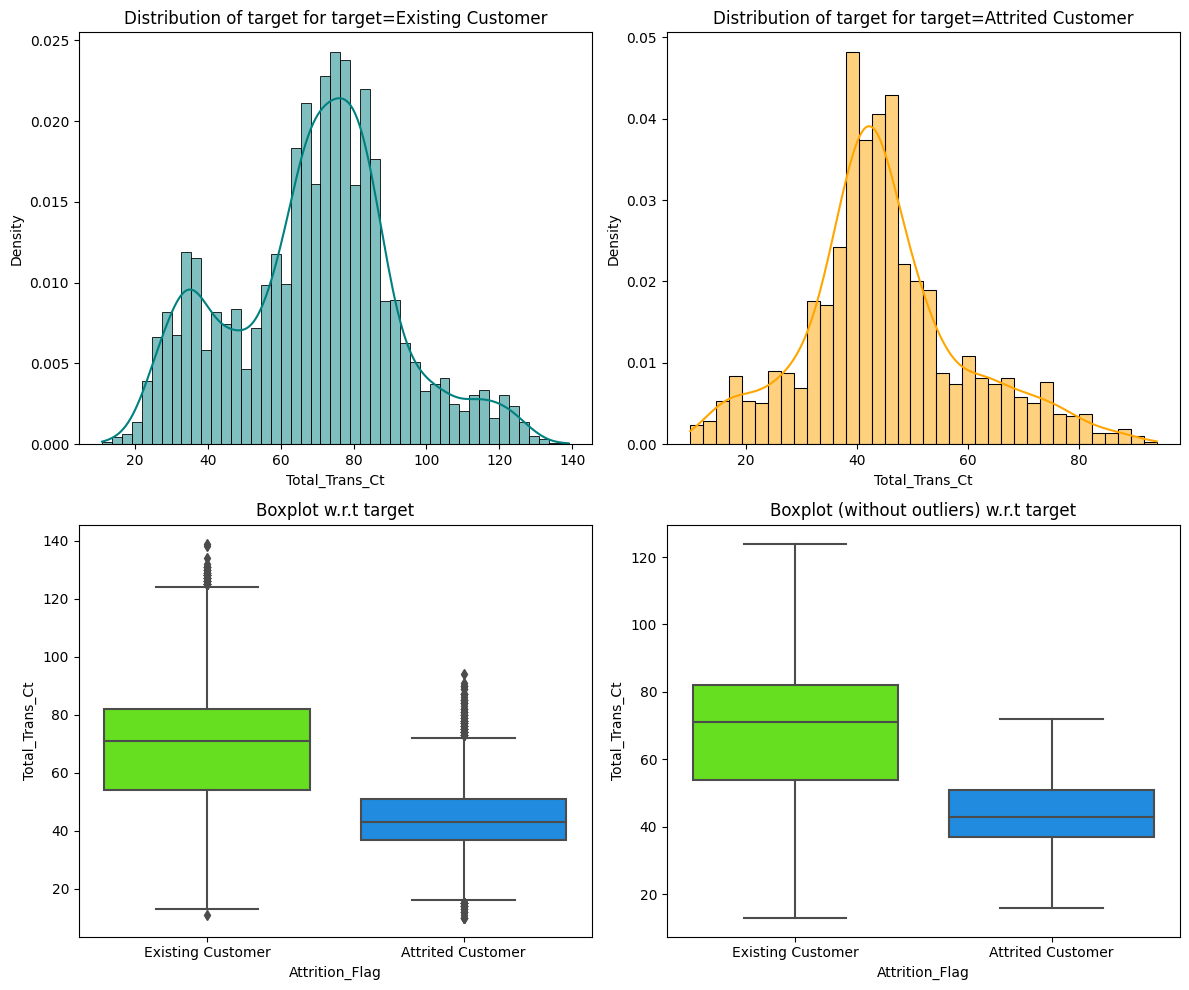

In [65]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

* The card transaction count of churning customers is lower than the count of existing customers.

### Attrition_Flag vs Total_Amt_Chng_Q4_Q1

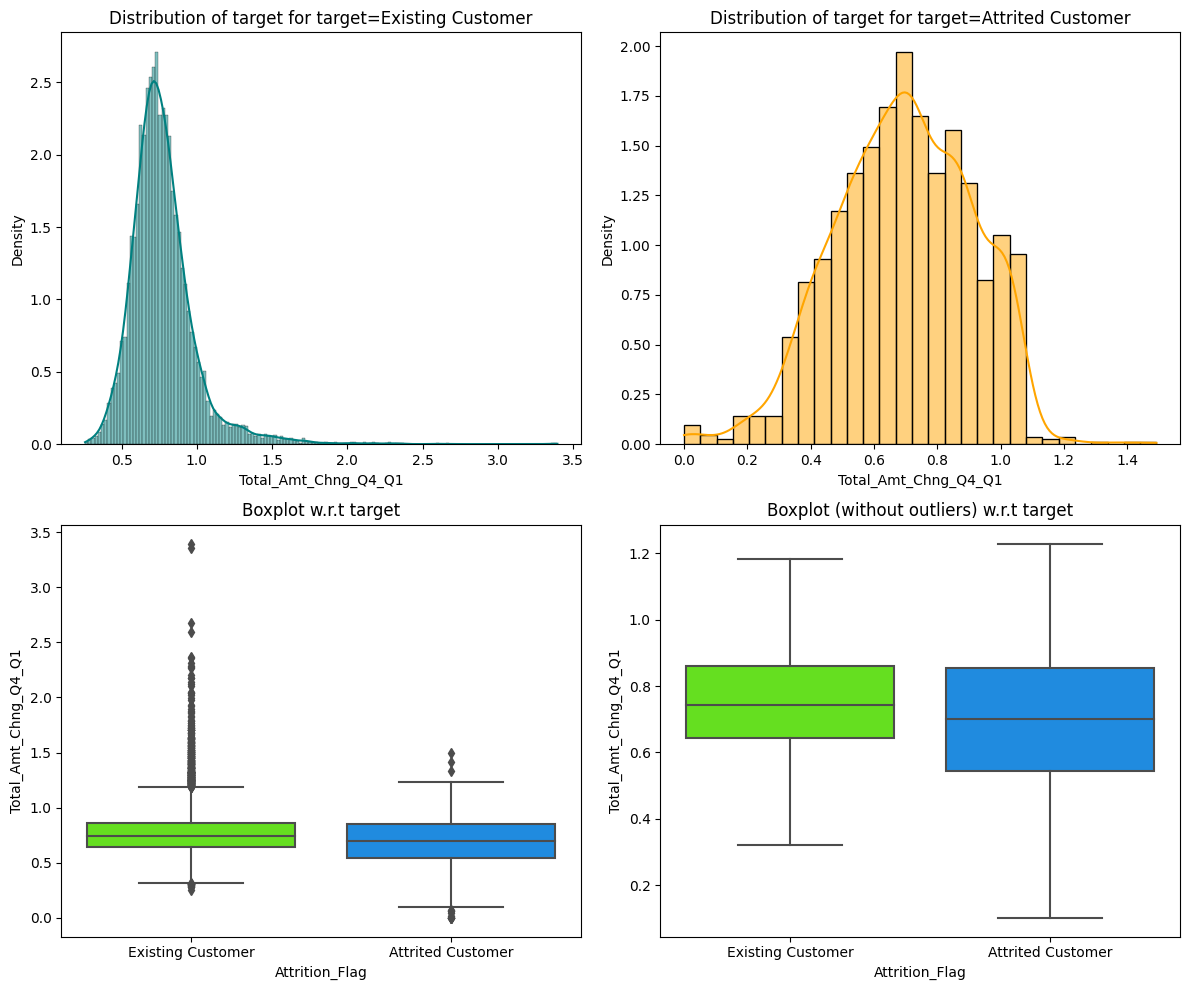

In [66]:
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

* The value of `Total_Amt_Chng_Q4_Q1` of churning customers tends to be slightly lower than that of existing customers, but the difference is not significant.

### Attrition_Flag vs Total_Ct_Chng_Q4_Q1

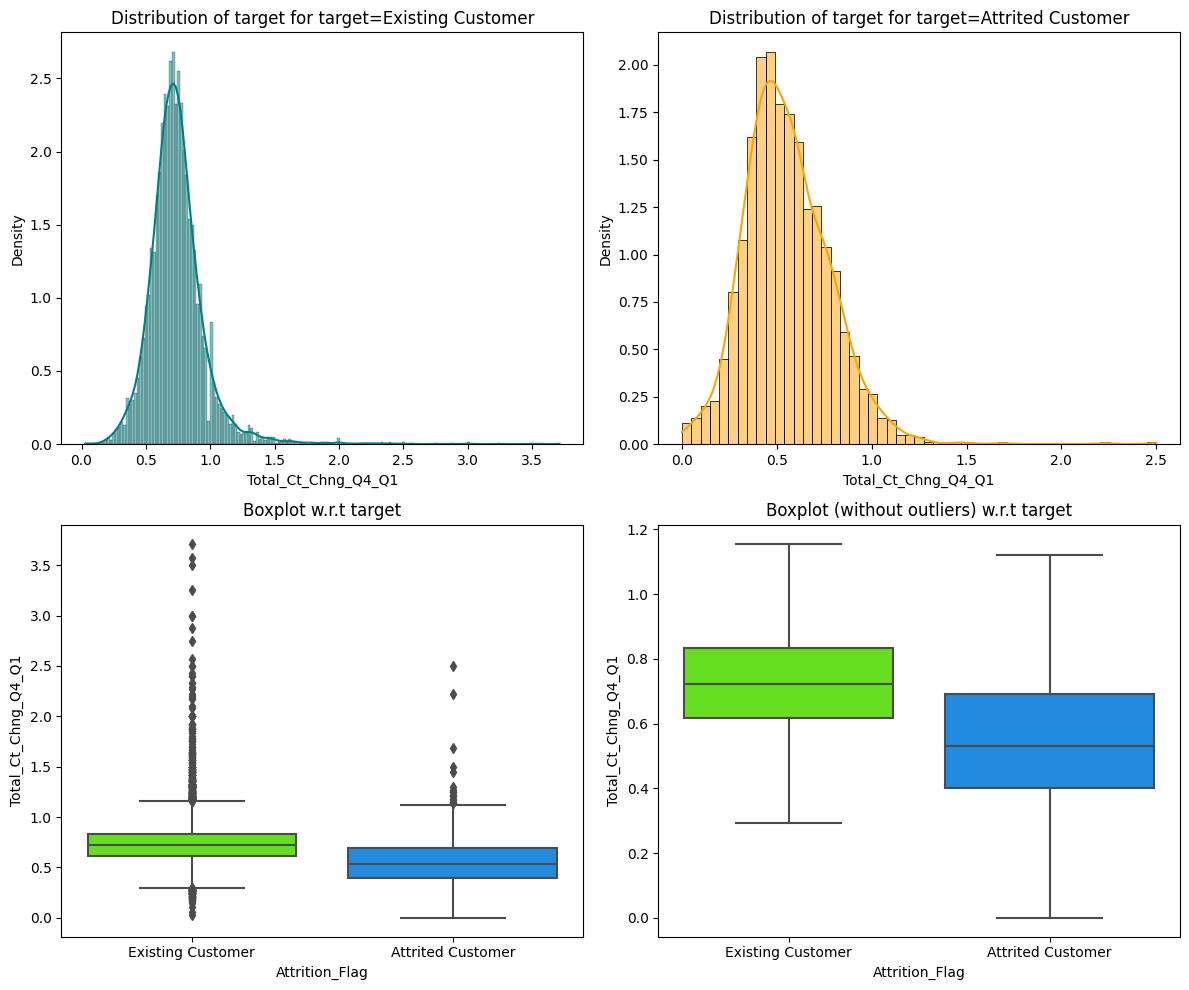

In [67]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* The value of `Total_Ct_Chng_Q4_Q1` of churning customers tends to be lower than that of existing customers,

### Attrition_Flag vs Avg_Utilization_Ratio

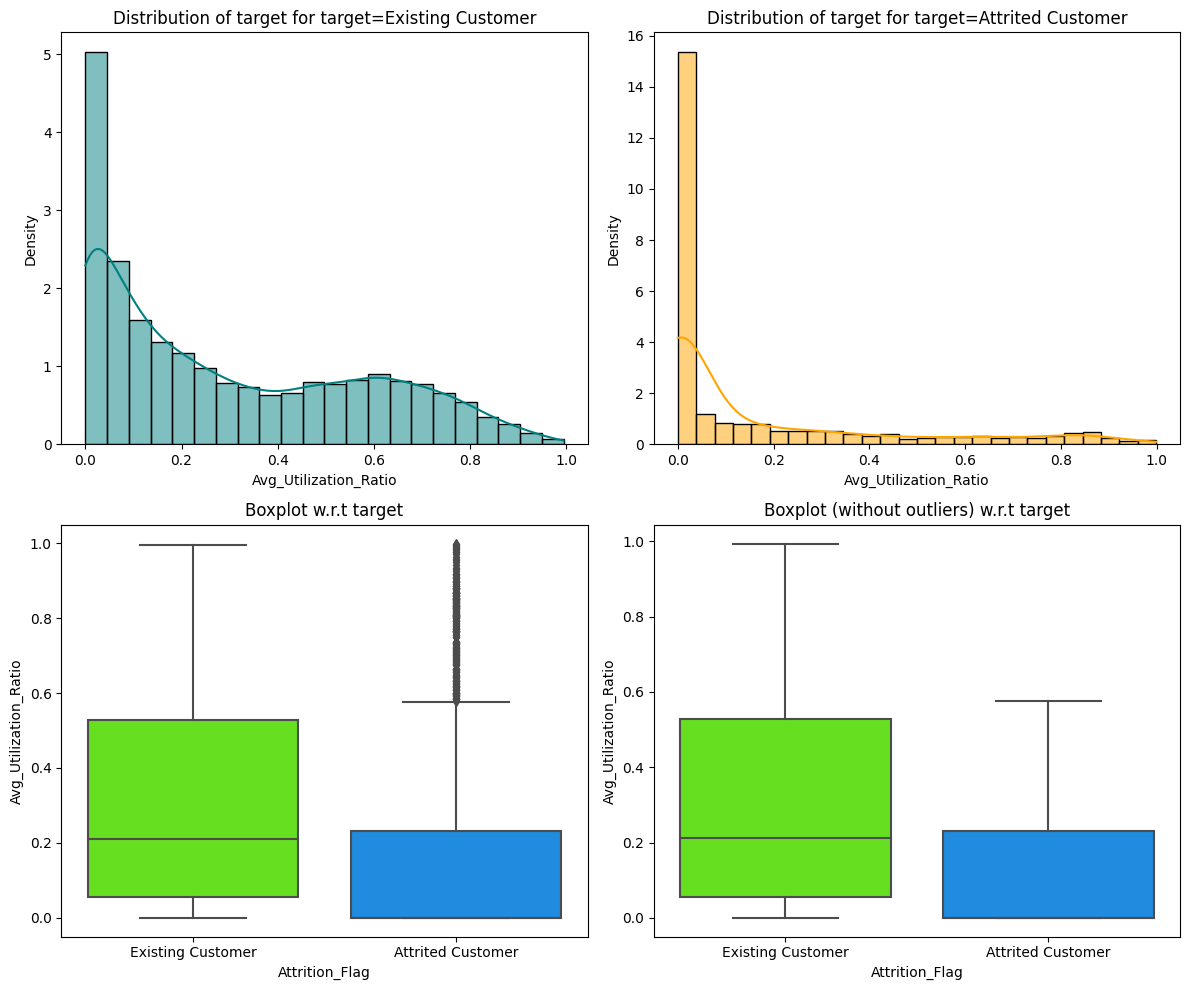

In [68]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

* The value of `Avg_Utilization_Ratio` of churning customers tends to be lower than that of existing customers,

### Total_Trans_Amt vs categorical variables

In [69]:
# extract column names with categorical values
categorical_col_names = data.select_dtypes(
    include=("object", "category")
).columns.to_list()

In [70]:
categorical_col_names

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Customer_Age_bin',
 'Total_Revolving_Bal_bin']

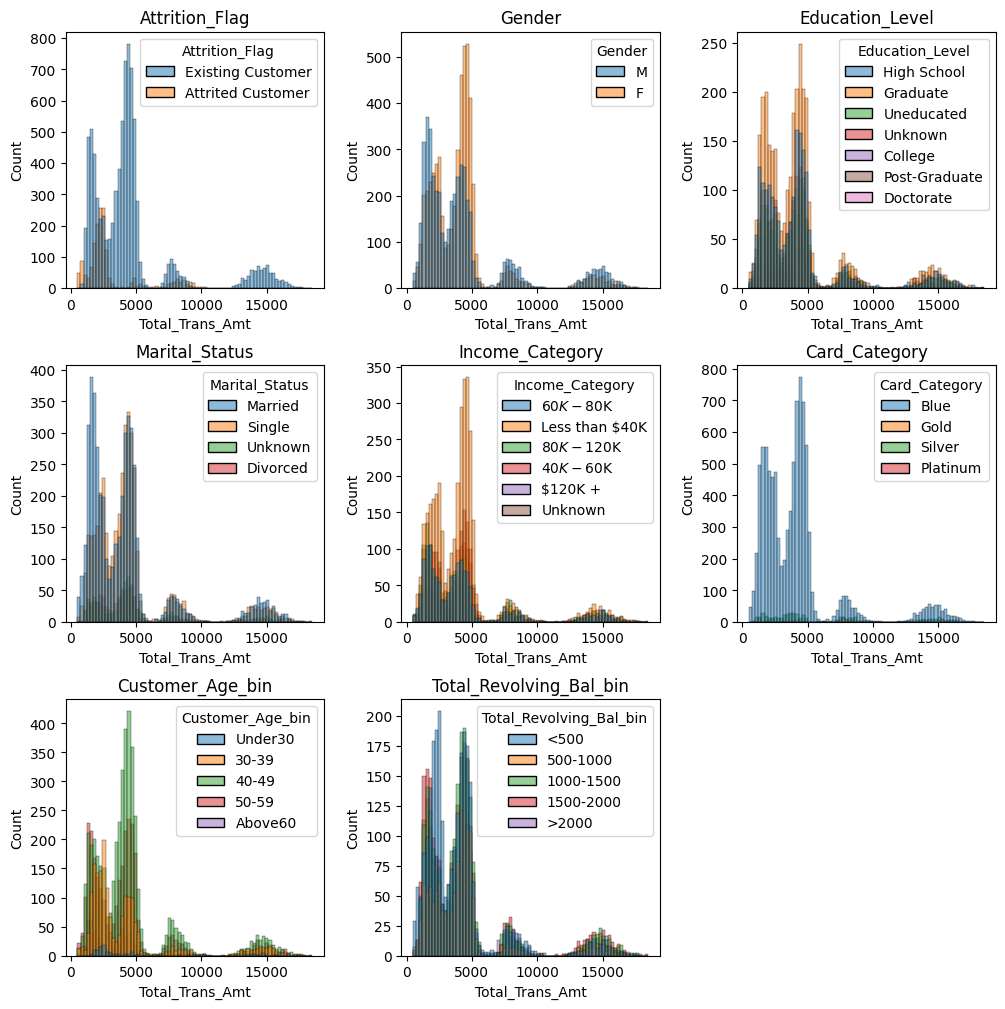

In [71]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i, feature in enumerate(categorical_col_names):
    row_index = i // 3  # for ax index
    col_index = i % 3  # for ax index
    subfig = sns.histplot(
        data=data, x="Total_Trans_Amt", hue=feature, ax=ax[row_index, col_index]
    )
    ax[row_index, col_index].set_title(feature)
fig.delaxes(ax[2, 2])
plt.show()

* It seems that additional customer information is needed to know the factors contributing to the multimodal distribution of the `Total_Trans_Amt` column.

### Total_Revolving_Bal vs categorical variables

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  object  
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  object  
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  object  
 6   Marital_Status            10127 non-null  object  
 7   Income_Category           10127 non-null  object  
 8   Card_Category             10127 non-null  object  
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [73]:
categorical_col_names = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Customer_Age_bin",
]

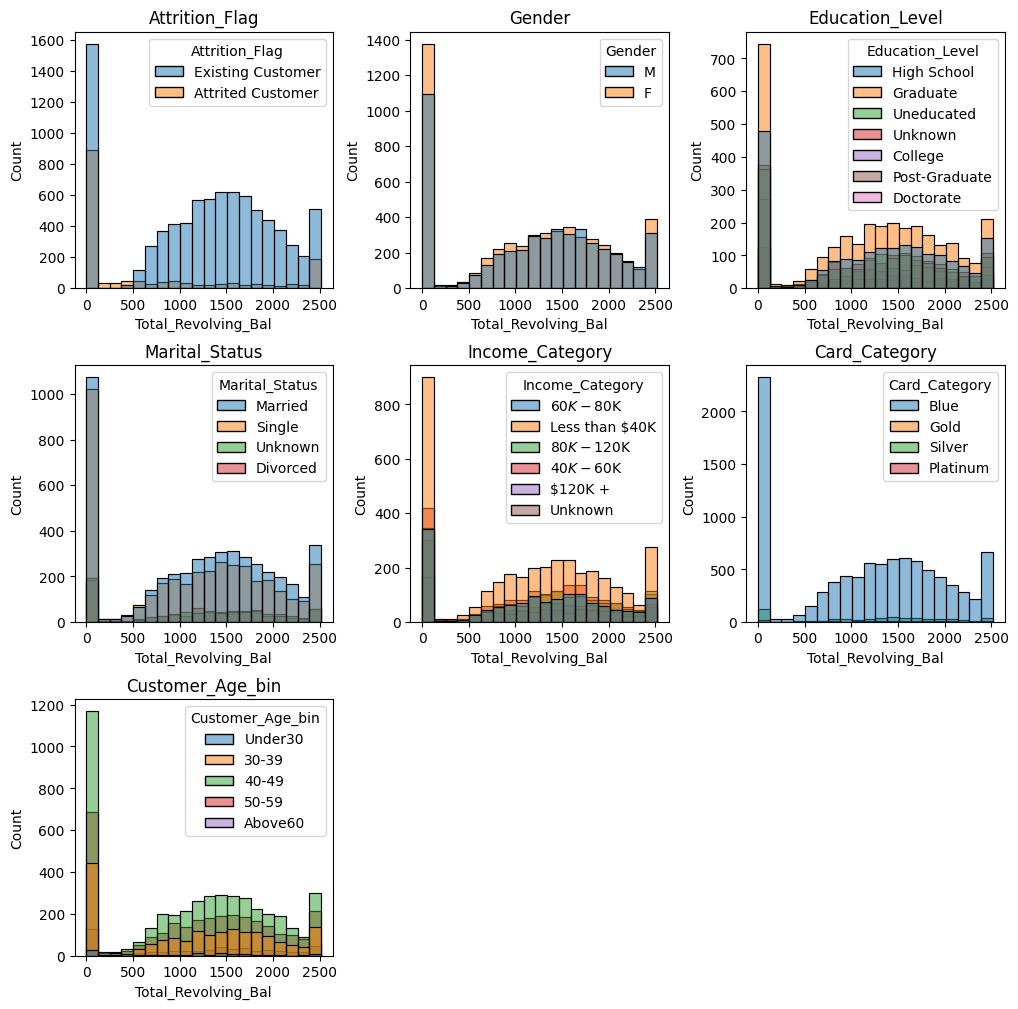

In [74]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i, feature in enumerate(categorical_col_names):
    row_index = i // 3  # for ax index
    col_index = i % 3  # for ax index
    subfig = sns.histplot(
        data=data, x="Total_Revolving_Bal", hue=feature, ax=ax[row_index, col_index]
    )
    ax[row_index, col_index].set_title(feature)
fig.delaxes(ax[2, 1])
fig.delaxes(ax[2, 2])
plt.show()

* As previously observed, there is a difference in the Revolving Balance pattern for each group in the `Attrition_Flag` feature.


### Total_Revolving_Bal vs Credit_Limit vs Attrition_Flag

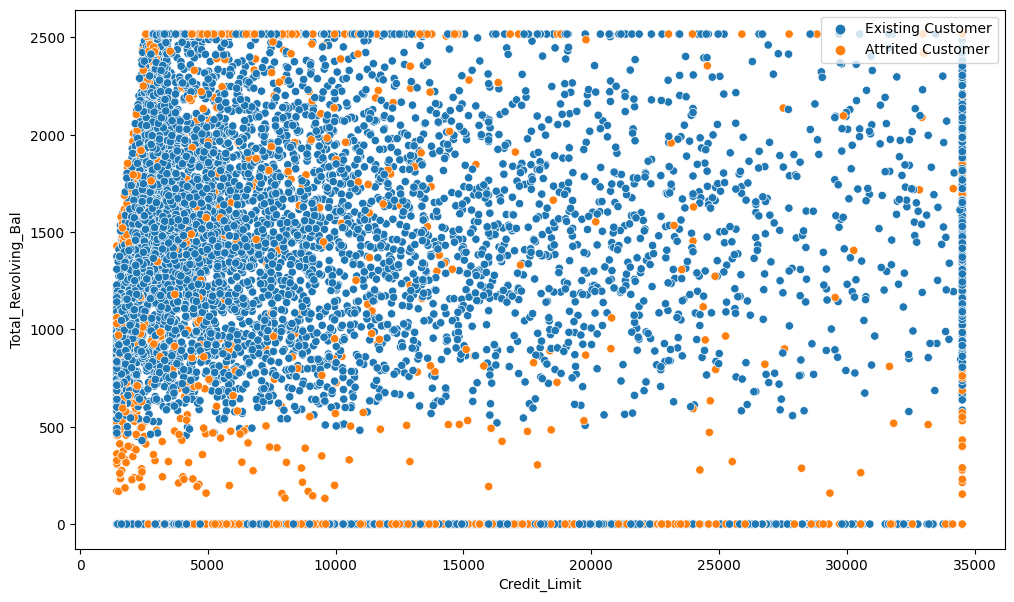

In [75]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=data, x="Credit_Limit", y="Total_Revolving_Bal", hue="Attrition_Flag"
)
plt.legend(loc="upper right")
plt.show()

* It was observed that there was not much difference in the revolving limit according to `CreditLimit`.
* Among customers located at the boundary of the revolving limit, churning customers are observed relatively frequently, suggesting that insufficient revolving limit may be the cause of churn.


## Key Observations from EDA

* The churn rate of customers in their 40s and 50s is relatively high.
* The churn rate of highly educated customers is relatively high.
* High-income customers have a relatively high churn rate.
* Customers with high-grade cards have a high churn rate.
* As the number of products held by customers decreased, a tendency was observed to have a higher churn rate.
* The churn rate of customers with an inactive period of less than 1 month is the highest at about 50%.
* The revolving balance of existing customers is relatively high.
* The value of `Total_Trans_Amt`, `Total_Trans_Ct`,`Total_Ct_Chng_Q4_Q1` and `Avg_Utilization_Ratio` of churning customers tends to be lower than that of existing customers.
* Among customers located at the boundary of the revolving limit, churning customers are observed relatively frequently, suggesting that insufficient revolving limit may be the cause of churn.

## Creating training, validation and test set

* Since the column `Avg_Open_To_Buy` is almost dependent on `Credit_Limit` and is a value calculated from the difference between `Credit_Limit` and `Total_Revolving_Bal`, it will be excluded from the model building.
* Since the column `CLIENTNUM` has no information, it will be excluded from the model building.

### Training, Validation and Test set

In [76]:
X_raw = data.drop(
    [
        "CLIENTNUM",
        "Attrition_Flag",
        "Avg_Open_To_Buy",
        "Customer_Age_bin",
        "Total_Revolving_Bal_bin",
    ],
    axis=1,
)
X = pd.get_dummies(X_raw, drop_first=True)

In [77]:
y = data["Attrition_Flag"].replace({"Attrited Customer": 1, "Existing Customer": 0})

In [78]:
# Splitting data into training, validation and test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 31) (2026, 31) (2026, 31)


In [79]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.839342
1    0.160658
Name: Attrition_Flag, dtype: float64
Percentage of classes in validation set:
0    0.839092
1    0.160908
Name: Attrition_Flag, dtype: float64
Percentage of classes in test set:
0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64


### Outlier treatment on train set

#### Outlier detection

In [80]:
# IQR defining - train
Q1 = X_train.quantile(0.25)  # finding the 25th percentile.
Q3 = X_train.quantile(0.75)  # finding the 75th percentile.
IQR = Q3 - Q1  # inter quantile range (IQR)
lower = Q1 - 1.5 * IQR  # lower whisker
upper = Q3 + 1.5 * IQR  # upper whisker

In [81]:
(
    (X_train.select_dtypes(include=["float64", "int64"]) < lower)
    | (X_train.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(X_train) * 100

Avg_Utilization_Ratio             0.000000
Card_Category_Gold                0.000000
Card_Category_Platinum            0.000000
Card_Category_Silver              0.000000
Contacts_Count_12_mon             6.255144
Credit_Limit                      9.349794
Customer_Age                      0.016461
Dependent_count                   0.000000
Education_Level_Doctorate         0.000000
Education_Level_Graduate          0.000000
Education_Level_High School       0.000000
Education_Level_Post-Graduate     0.000000
Education_Level_Uneducated        0.000000
Education_Level_Unknown           0.000000
Gender_M                          0.000000
Income_Category_$40K - $60K       0.000000
Income_Category_$60K - $80K       0.000000
Income_Category_$80K - $120K      0.000000
Income_Category_Less than $40K    0.000000
Income_Category_Unknown           0.000000
Marital_Status_Married            0.000000
Marital_Status_Single             0.000000
Marital_Status_Unknown            0.000000
Months_Inac

Since `Contacts_Count_12_mon` and `Months_Inactive_12_mon` were excluded from outlier treatment using IQR because they were actually close to categorical variables.


#### Outlier treatment

In [82]:
columns_with_outliers = [
    "Credit_Limit",
    "Months_on_book",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Total_Trans_Amt",
]

In [83]:
for feature in columns_with_outliers:
    feature_lower = lower[feature]
    feature_upper = upper[feature]
    X_train[feature] = np.where(
        X_train[feature] > feature_upper,
        feature_upper,
        np.where(X_train[feature] < feature_lower, feature_lower, X_train[feature]),
    )  ## replacing outlier to upper/lower whiskers

### Oversampling train data using SMOTE

In [84]:
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [85]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 976
Before OverSampling, count of label '0': 5099 

After OverSampling, count of label '1': 2039
After OverSampling, count of label '0': 5099 

After OverSampling, the shape of train_X: (7138, 31)
After OverSampling, the shape of train_y: (7138,) 



### Undersampling train data using Random Undersampler

In [86]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [87]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 976
Before Under Sampling, count of label '0': 5099 

After Under Sampling, count of label '1': 976
After Under Sampling, count of label '0': 976 

After Under Sampling, the shape of train_X: (1952, 31)
After Under Sampling, the shape of train_y: (1952,) 



## Building Model

### Model evaluation criterion

#### Model can make wrong predictions as:
 
1. Predicting a customer will not attrite but in reality the customer would attrite it. - False Negative
2. Predicting a customer will attrite but in reality the customer would not attrite it. - False Positive

#### Which case is more important? 

* Predicting a customer will not attrite but in reality the customer would attrite it. i.e. losing customer and money.
* Need to maximize Recall.


### Functions

In [88]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [89]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

### Logistic Regression

#### Model building

In [90]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

#### Model performance

Accuracy    Recall  Precision        F1
0  0.883457  0.502049   0.688202  0.580569

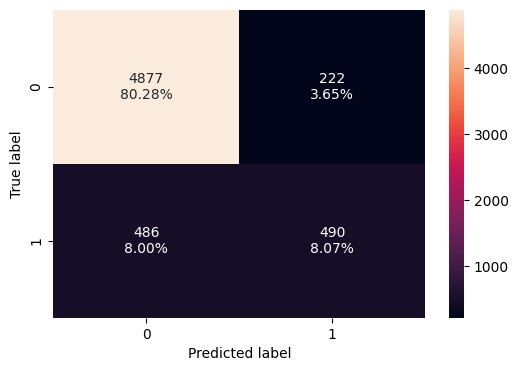

In [91]:
# Train set
confusion_matrix_sklearn(lr, X_train, y_train)

lr_train_perf = model_performance_classification_sklearn(lr, X_train, y_train)
lr_train_perf

Accuracy    Recall  Precision        F1
0  0.855874  0.542945   0.553125  0.547988

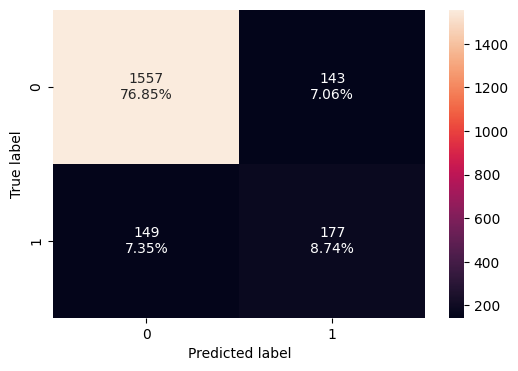

In [92]:
# Validation set
confusion_matrix_sklearn(lr, X_val, y_val)

lr_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
lr_val_perf

#### Model building - oversampled data

In [93]:
lr_over = LogisticRegression(random_state=1)
lr_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

#### Model performance - oversampled data

Accuracy    Recall  Precision        F1
0  0.836789  0.639039   0.752309  0.691063

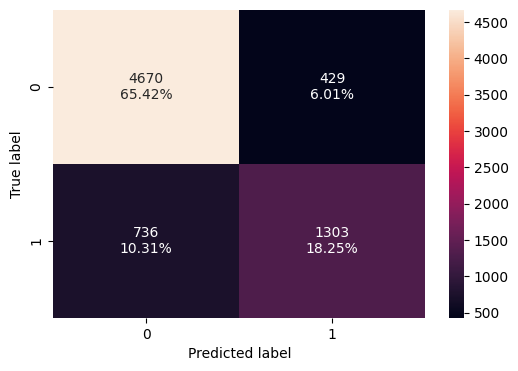

In [94]:
# Train set
confusion_matrix_sklearn(lr_over, X_train_over, y_train_over)

lr_over_train_perf = model_performance_classification_sklearn(
    lr_over, X_train_over, y_train_over
)
lr_over_train_perf

Accuracy    Recall  Precision        F1
0  0.827739  0.674847   0.475162  0.557668

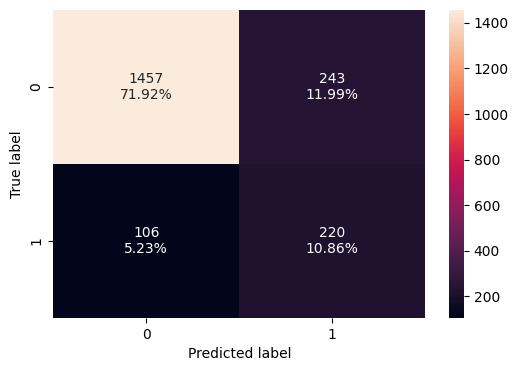

In [95]:
# Validation set
confusion_matrix_sklearn(lr_over, X_val, y_val)

lr_over_val_perf = model_performance_classification_sklearn(lr_over, X_val, y_val)
lr_over_val_perf

#### Model building - undersampled data

In [96]:
lr_un = LogisticRegression(random_state=1)
lr_un.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

#### Model performance - undersampled data

Accuracy    Recall  Precision        F1
0  0.818135  0.807377   0.825131  0.816157

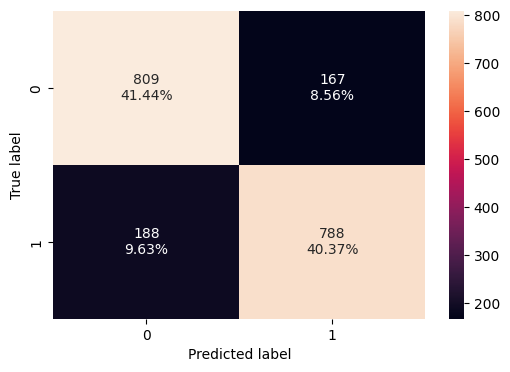

In [97]:
# Train set
confusion_matrix_sklearn(lr_un, X_train_un, y_train_un)

lr_un_train_perf = model_performance_classification_sklearn(
    lr_un, X_train_un, y_train_un
)
lr_un_train_perf

Accuracy    Recall  Precision        F1
0  0.758638  0.815951   0.382734  0.521058

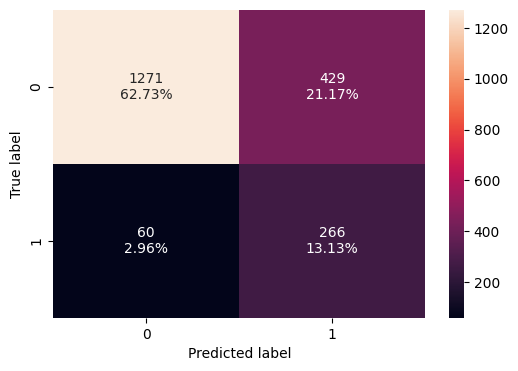

In [98]:
# Validation set
confusion_matrix_sklearn(lr_un, X_val, y_val)

lr_un_val_perf = model_performance_classification_sklearn(lr_un, X_val, y_val)
lr_un_val_perf

### Decision Tree Classifier

#### Model building

In [99]:
dt = DecisionTreeClassifier(criterion="gini", random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Model performance

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

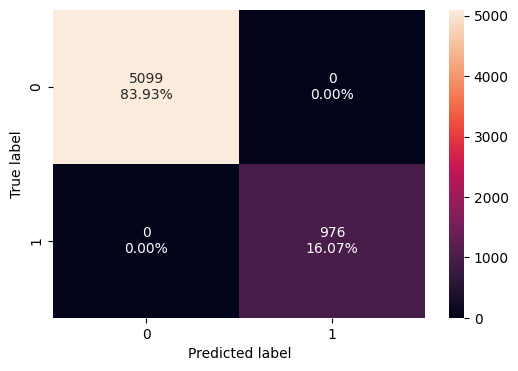

In [100]:
# Train set
confusion_matrix_sklearn(dt, X_train, y_train)

dt_train_perf = model_performance_classification_sklearn(dt, X_train, y_train)
dt_train_perf

Accuracy    Recall  Precision        F1
0  0.938796  0.812883   0.807927  0.810398

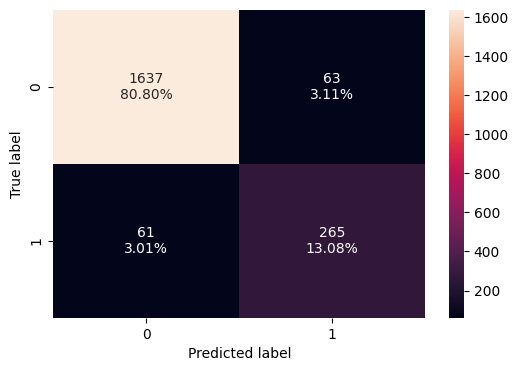

In [101]:
# Validation set
confusion_matrix_sklearn(dt, X_val, y_val)

dt_val_perf = model_performance_classification_sklearn(dt, X_val, y_val)
dt_val_perf

#### Model building - oversampled data

In [102]:
dt_over = DecisionTreeClassifier(criterion="gini", random_state=1)
dt_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

#### Model performance - oversampled data

Accuracy    Recall  Precision        F1
0  0.986271  0.951937        1.0  0.975377

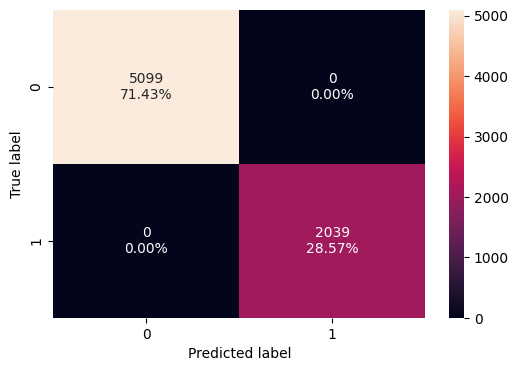

In [103]:
# Train set
confusion_matrix_sklearn(dt_over, X_train_over, y_train_over)

dt_over_train_perf = model_performance_classification_sklearn(
    dt, X_train_over, y_train_over
)
dt_over_train_perf

Accuracy    Recall  Precision        F1
0  0.937808  0.819018   0.799401  0.809091

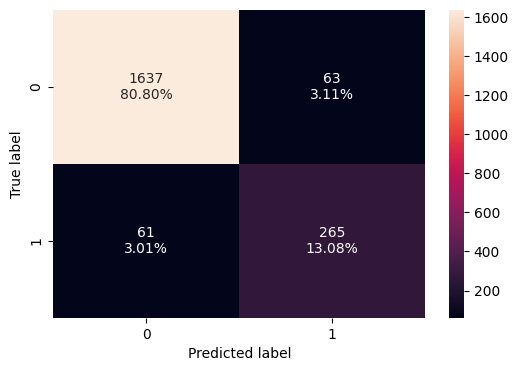

In [104]:
# Validation set
confusion_matrix_sklearn(dt, X_val, y_val)

dt_over_val_perf = model_performance_classification_sklearn(dt_over, X_val, y_val)
dt_over_val_perf

#### Model building - undersampled data

In [105]:
dt_un = DecisionTreeClassifier(criterion="gini", random_state=1)
dt_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

#### Model performance - undersampled data

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

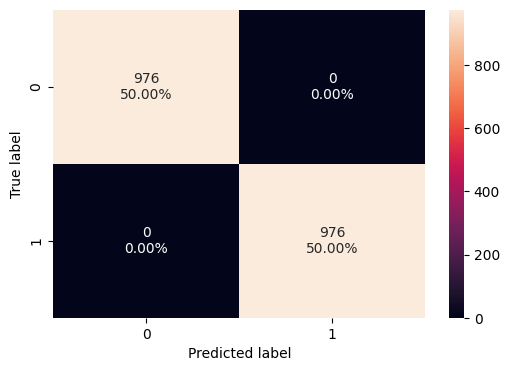

In [106]:
# Train set
confusion_matrix_sklearn(dt_un, X_train_un, y_train_un)

dt_un_train_perf = model_performance_classification_sklearn(
    dt_un, X_train_un, y_train_un
)
dt_un_train_perf

Accuracy    Recall  Precision        F1
0  0.890918  0.904908   0.608247  0.727497

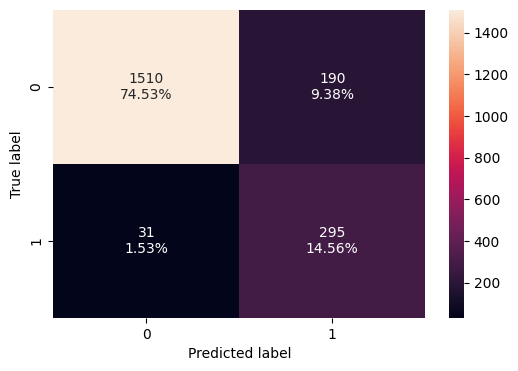

In [107]:
# Validation set
confusion_matrix_sklearn(dt_un, X_val, y_val)

dt_un_val_perf = model_performance_classification_sklearn(dt_un, X_val, y_val)
dt_un_val_perf

### Bagging Classifier

#### Model building

In [108]:
bg = BaggingClassifier(random_state=1)
bg.fit(X_train, y_train)

BaggingClassifier(random_state=1)

#### Model performance

Accuracy    Recall  Precision        F1
0  0.997037  0.985656   0.995859  0.990731

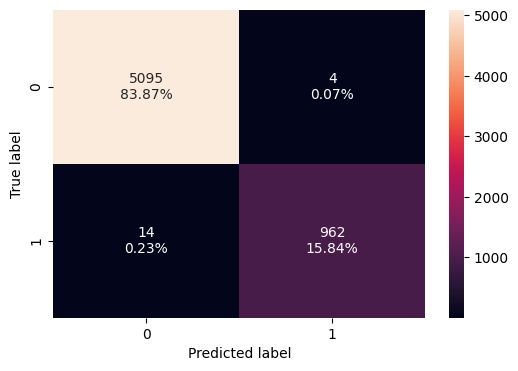

In [109]:
# Train set
confusion_matrix_sklearn(bg, X_train, y_train)

bg_train_perf = model_performance_classification_sklearn(bg, X_train, y_train)
bg_train_perf

Accuracy    Recall  Precision        F1
0  0.957058  0.828221    0.89701  0.861244

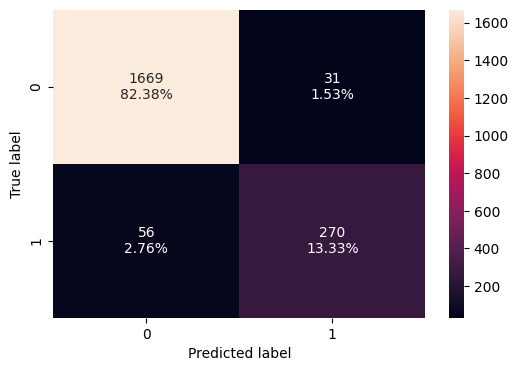

In [110]:
# Validation set
confusion_matrix_sklearn(bg, X_val, y_val)

bg_val_perf = model_performance_classification_sklearn(bg, X_val, y_val)
bg_val_perf

#### Model building - oversampled data

In [111]:
bg_over = BaggingClassifier(random_state=1)
bg_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

#### Model performance - oversampled data

Accuracy    Recall  Precision        F1
0  0.998319  0.995096   0.999015  0.997052

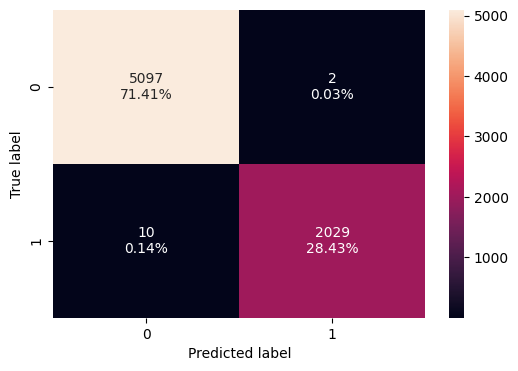

In [112]:
# Train set
confusion_matrix_sklearn(bg_over, X_train_over, y_train_over)

bg_over_train_perf = model_performance_classification_sklearn(
    bg_over, X_train_over, y_train_over
)
bg_over_train_perf

Accuracy    Recall  Precision        F1
0  0.957552  0.871166   0.865854  0.868502

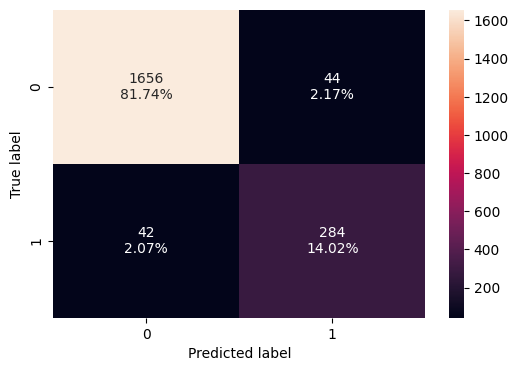

In [113]:
# Validation set
confusion_matrix_sklearn(bg_over, X_val, y_val)

bg_over_val_perf = model_performance_classification_sklearn(bg_over, X_val, y_val)
bg_over_val_perf

#### Model building - undersampled data

In [114]:
bg_un = BaggingClassifier(random_state=1)
bg_un.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

#### Model performance - undersampled data

Accuracy    Recall  Precision        F1
0  0.995389  0.991803   0.998968  0.995373

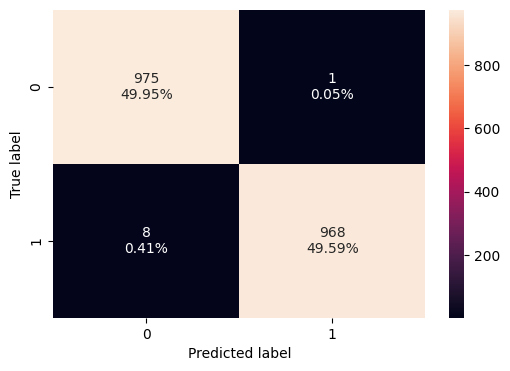

In [115]:
# Train set
confusion_matrix_sklearn(bg_un, X_train_un, y_train_un)

bg_un_train_perf = model_performance_classification_sklearn(
    bg_un, X_train_un, y_train_un
)
bg_un_train_perf

Accuracy    Recall  Precision        F1
0  0.929418  0.941718   0.712297  0.811096

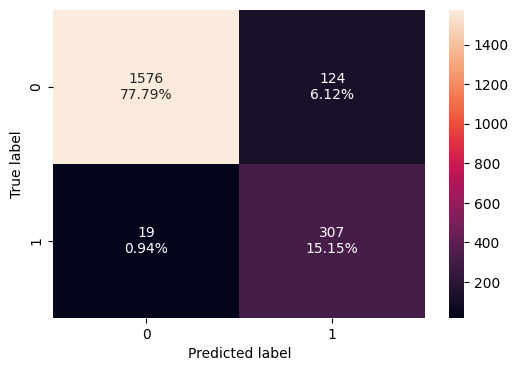

In [116]:
# Validation set
confusion_matrix_sklearn(bg_un, X_val, y_val)

bg_un_val_perf = model_performance_classification_sklearn(bg_un, X_val, y_val)
bg_un_val_perf

### Random Forest Classifier

#### Model building

In [117]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### Model performance

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

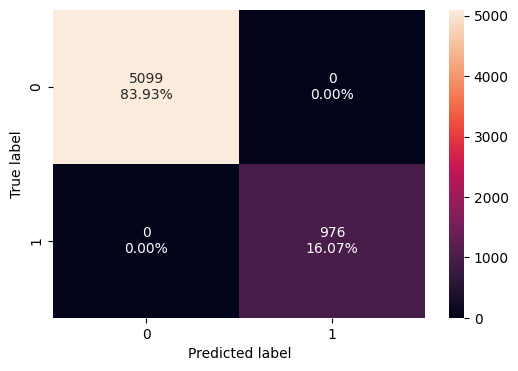

In [118]:
# Train set
confusion_matrix_sklearn(rf, X_train, y_train)

rf_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
rf_train_perf

Accuracy    Recall  Precision        F1
0  0.956565  0.794479      0.925  0.854785

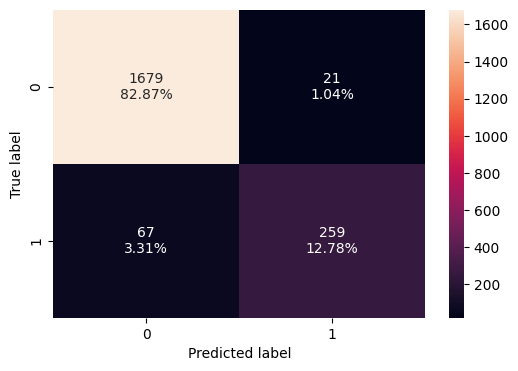

In [119]:
# Validation set
confusion_matrix_sklearn(rf, X_val, y_val)

rf_val_perf = model_performance_classification_sklearn(rf, X_val, y_val)
rf_val_perf

#### Model building - oversampled data

In [120]:
rf_over = RandomForestClassifier(random_state=1)
rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

#### Model performance - oversampled data

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

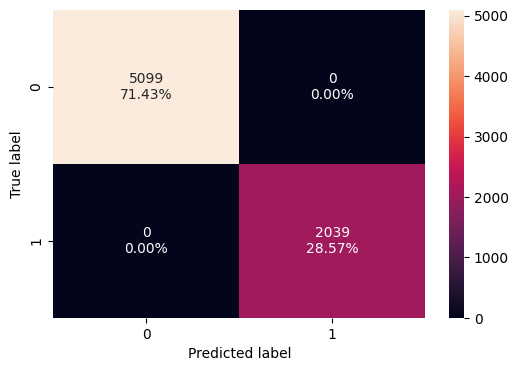

In [121]:
# Train set
confusion_matrix_sklearn(rf_over, X_train_over, y_train_over)

rf_over_train_perf = model_performance_classification_sklearn(
    rf_over, X_train_over, y_train_over
)
rf_over_train_perf

Accuracy    Recall  Precision        F1
0  0.957552  0.840491    0.88961  0.864353

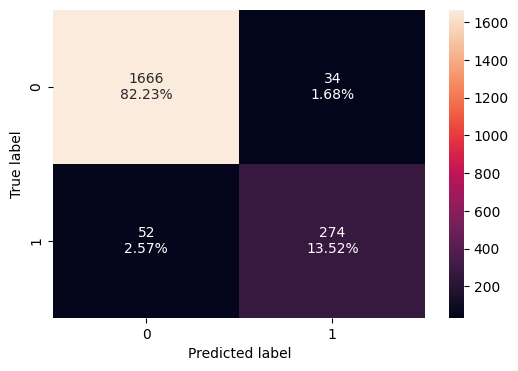

In [122]:
# Validation set
confusion_matrix_sklearn(rf_over, X_val, y_val)

rf_over_val_perf = model_performance_classification_sklearn(rf_over, X_val, y_val)
rf_over_val_perf

#### Model building - undersampled data

In [123]:
rf_un = RandomForestClassifier(random_state=1)
rf_un.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=1)

#### Model performance - undersampled data

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

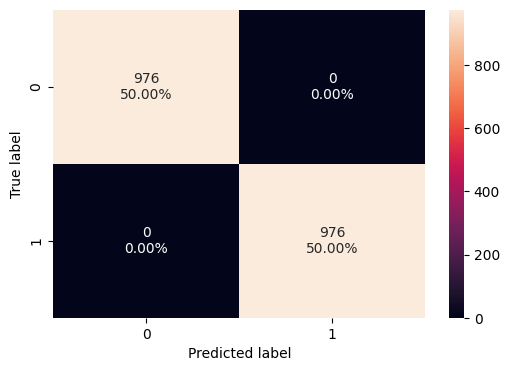

In [124]:
# Train set
confusion_matrix_sklearn(rf_un, X_train_un, y_train_un)

rf_un_train_perf = model_performance_classification_sklearn(
    rf_un, X_train_un, y_train_un
)
rf_un_train_perf

Accuracy    Recall  Precision       F1
0  0.928924  0.917178    0.71875  0.80593

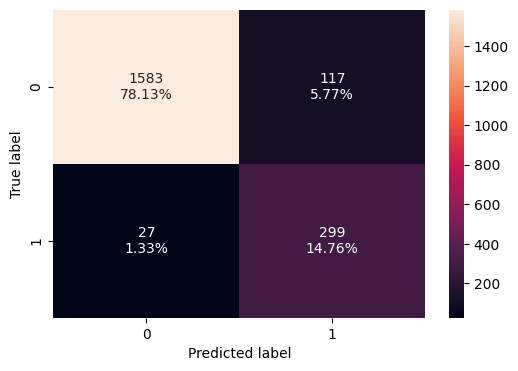

In [125]:
# Validation set
confusion_matrix_sklearn(rf_un, X_val, y_val)

rf_un_val_perf = model_performance_classification_sklearn(rf_un, X_val, y_val)
rf_un_val_perf

### AdaBoost Classifier

#### Model building

In [126]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

#### Model performance

Accuracy    Recall  Precision        F1
0   0.95786  0.843238   0.888769  0.865405

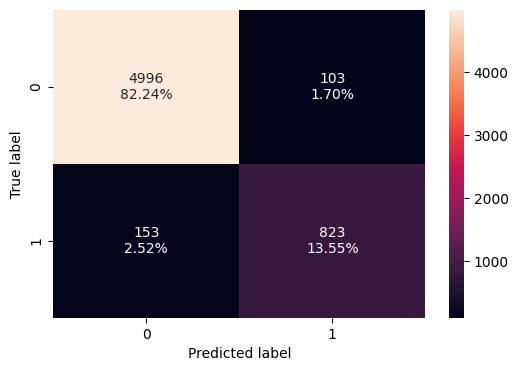

In [127]:
# Train set
confusion_matrix_sklearn(abc, X_train, y_train)

abc_train_perf = model_performance_classification_sklearn(abc, X_train, y_train)
abc_train_perf

Accuracy    Recall  Precision       F1
0  0.962488  0.868098    0.89557  0.88162

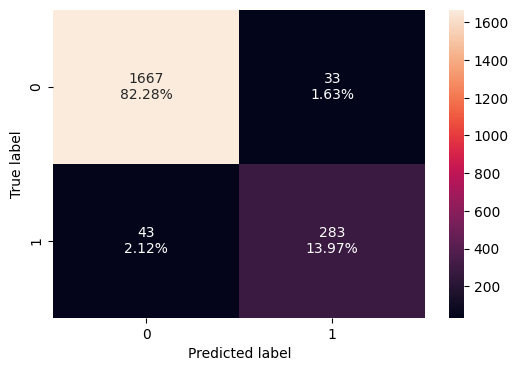

In [128]:
# Validation set
confusion_matrix_sklearn(abc, X_val, y_val)

abc_val_perf = model_performance_classification_sklearn(abc, X_val, y_val)
abc_val_perf

#### Model building - oversampled data

In [129]:
abc_over = AdaBoostClassifier(random_state=1)
abc_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

#### Model performance - oversampled data

Accuracy  Recall  Precision        F1
0  0.954897   0.875   0.848907  0.861756

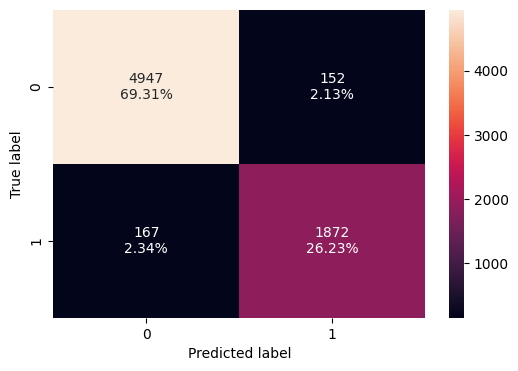

In [130]:
# Train set
confusion_matrix_sklearn(abc_over, X_train_over, y_train_over)

abc_over_train_perf = model_performance_classification_sklearn(
    abc_over, X_train, y_train
)
abc_over_train_perf

Accuracy    Recall  Precision        F1
0   0.95459  0.886503   0.840116  0.862687

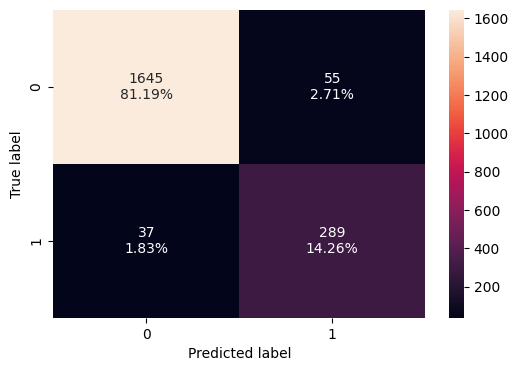

In [131]:
# Validation set
confusion_matrix_sklearn(abc_over, X_val, y_val)

abc_over_val_perf = model_performance_classification_sklearn(abc_over, X_val, y_val)
abc_over_val_perf

#### Model building - undersampled data

In [132]:
abc_un = AdaBoostClassifier(random_state=1)
abc_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

#### Model performance - undersampled data

Accuracy    Recall  Precision        F1
0   0.94877  0.953893   0.944219  0.949032

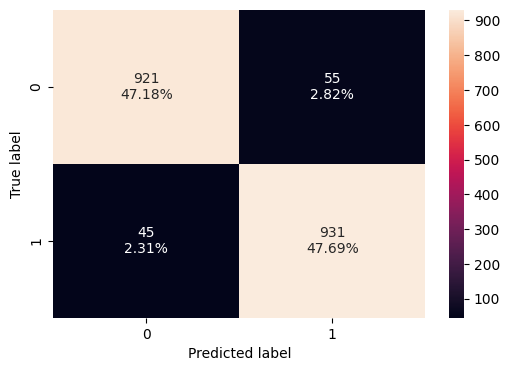

In [133]:
# Train set
confusion_matrix_sklearn(abc_un, X_train_un, y_train_un)

abc_un_train_perf = model_performance_classification_sklearn(
    abc_un, X_train_un, y_train_un
)
abc_un_train_perf

Accuracy    Recall  Precision        F1
0   0.93386  0.969325   0.718182  0.825065

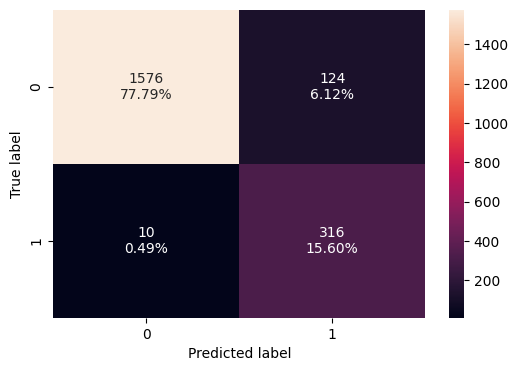

In [134]:
# Validation set
confusion_matrix_sklearn(abc_un, X_val, y_val)

abc_un_val_perf = model_performance_classification_sklearn(abc_un, X_val, y_val)
abc_un_val_perf

### Gradient Boost Classifier

#### Model building

In [135]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### Model performance

Accuracy    Recall  Precision        F1
0  0.973333  0.878074   0.952222  0.913646

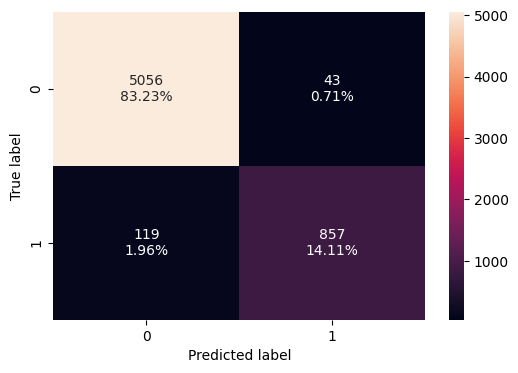

In [136]:
# Train set
confusion_matrix_sklearn(gbc, X_train, y_train)

gbc_train_perf = model_performance_classification_sklearn(gbc, X_train, y_train)
gbc_train_perf

Accuracy    Recall  Precision        F1
0  0.969398  0.861963   0.942953  0.900641

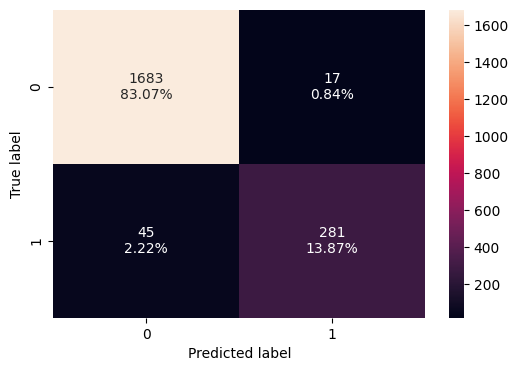

In [137]:
# Validation set
confusion_matrix_sklearn(gbc, X_val, y_val)

gbc_val_perf = model_performance_classification_sklearn(gbc, X_val, y_val)
gbc_val_perf

#### Model building - oversampled data

In [138]:
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

#### Model performance - oversampled data

Accuracy    Recall  Precision        F1
0   0.97251  0.908811   0.919171  0.913962

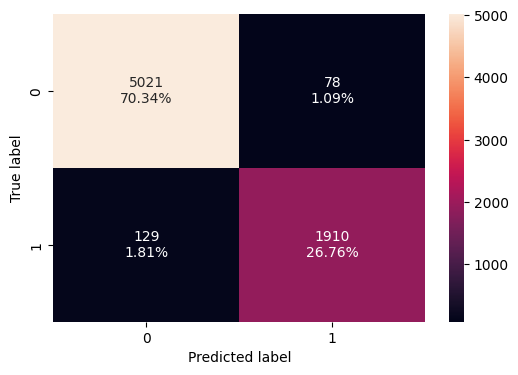

In [139]:
# Train set
confusion_matrix_sklearn(gbc_over, X_train_over, y_train_over)

gbc_over_train_perf = model_performance_classification_sklearn(
    gbc_over, X_train, y_train
)
gbc_over_train_perf

Accuracy    Recall  Precision        F1
0  0.963968  0.898773    0.87988  0.889226

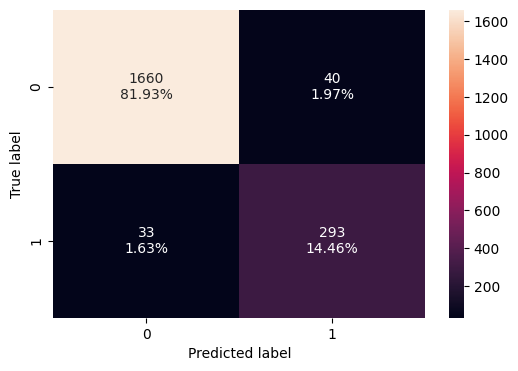

In [140]:
# Validation set
confusion_matrix_sklearn(gbc_over, X_val, y_val)

gbc_over_val_perf = model_performance_classification_sklearn(gbc_over, X_val, y_val)
gbc_over_val_perf

#### Model building - undersampled data

In [141]:
gbc_un = GradientBoostingClassifier(random_state=1)
gbc_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

#### Model performance - undersampled data

Accuracy    Recall  Precision        F1
0  0.974385  0.980533   0.968623  0.974542

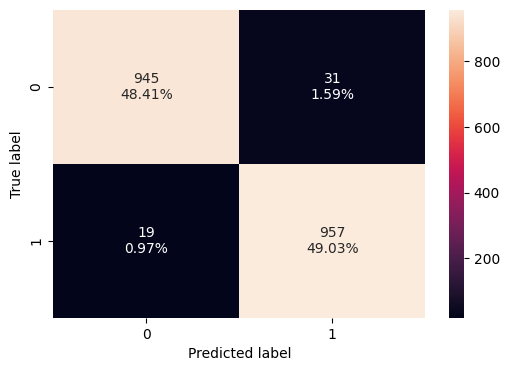

In [142]:
# Train set
confusion_matrix_sklearn(gbc_un, X_train_un, y_train_un)

gbc_un_train_perf = model_performance_classification_sklearn(
    gbc_un, X_train_un, y_train_un
)
gbc_un_train_perf

Accuracy    Recall  Precision     F1
0  0.937808  0.957055   0.735849  0.832

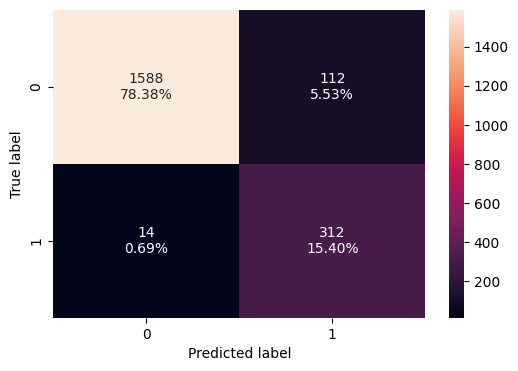

In [143]:
# Validation set
confusion_matrix_sklearn(gbc_un, X_val, y_val)

gbc_un_val_perf = model_performance_classification_sklearn(gbc_un, X_val, y_val)
gbc_un_val_perf

### XGBoost Classifier

#### Model building

In [144]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Model performance

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

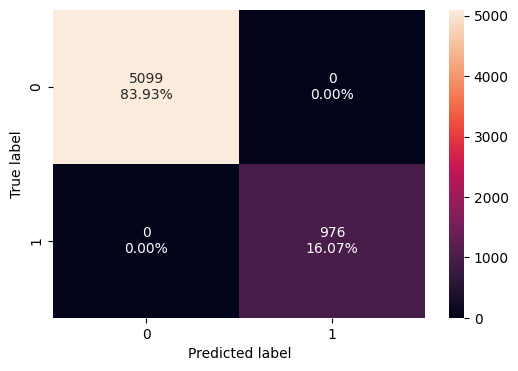

In [145]:
# Train set
confusion_matrix_sklearn(xgb, X_train, y_train)

xgb_train_perf = model_performance_classification_sklearn(xgb, X_train, y_train)
xgb_train_perf

Accuracy    Recall  Precision        F1
0  0.971372  0.892638   0.926752  0.909375

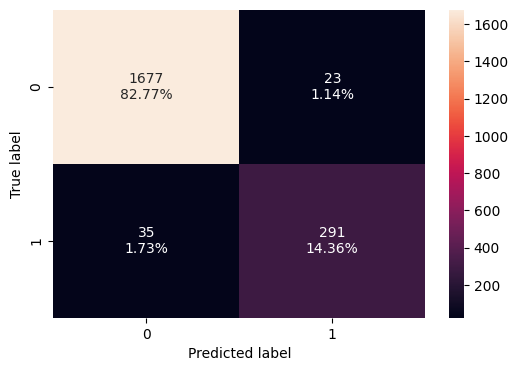

In [146]:
# Validation set
confusion_matrix_sklearn(xgb, X_val, y_val)

xgb_val_perf = model_performance_classification_sklearn(xgb, X_val, y_val)
xgb_val_perf

#### Model building - oversampled data

In [147]:
xgb_over = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Model performance - oversampled data

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

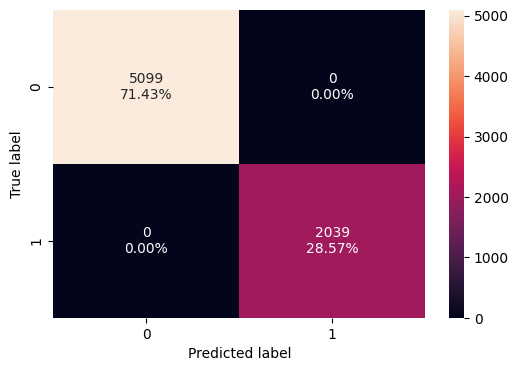

In [148]:
# Train set
confusion_matrix_sklearn(xgb_over, X_train_over, y_train_over)

xgb_over_train_perf = model_performance_classification_sklearn(
    xgb_over, X_train_over, y_train_over
)
xgb_over_train_perf

Accuracy    Recall  Precision        F1
0  0.969398  0.904908   0.904908  0.904908

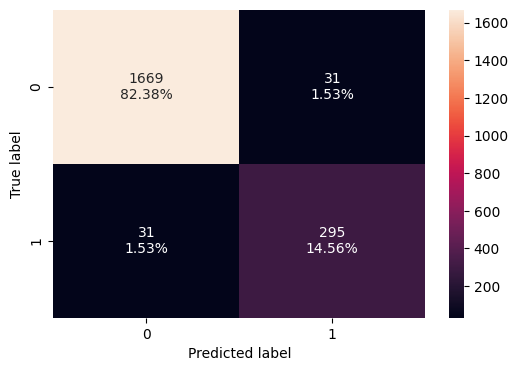

In [149]:
# Validation set
confusion_matrix_sklearn(xgb_over, X_val, y_val)

xgb_over_val_perf = model_performance_classification_sklearn(xgb_over, X_val, y_val)
xgb_over_val_perf

#### Model building - undersampled data

In [150]:
xgb_un = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Model performance - undersampled data

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

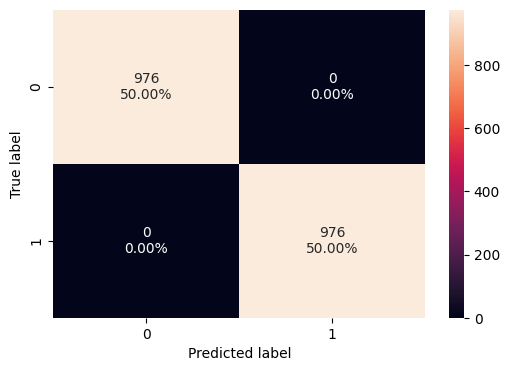

In [151]:
# Train set
confusion_matrix_sklearn(xgb_un, X_train_un, y_train_un)

xgb_un_train_perf = model_performance_classification_sklearn(
    xgb_un, X_train_un, y_train_un
)
xgb_un_train_perf

Accuracy    Recall  Precision        F1
0  0.944225  0.957055   0.759124  0.846676

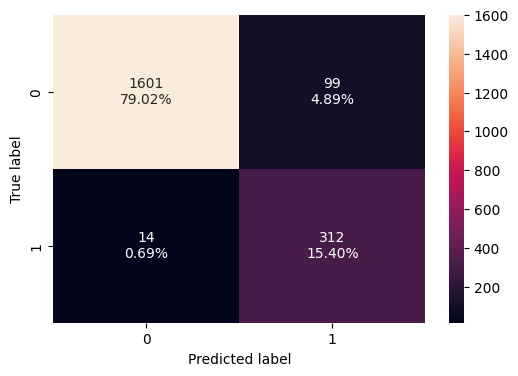

In [152]:
# Validation set
confusion_matrix_sklearn(xgb_un, X_val, y_val)

xgb_un_val_perf = model_performance_classification_sklearn(xgb_un, X_val, y_val)
xgb_un_val_perf

### Model performance summary

#### Training performance comparison

In [153]:
models_train_comp_df = pd.concat(
    [
        lr_train_perf.T,
        lr_over_train_perf.T,
        lr_un_train_perf.T,
        dt_train_perf.T,
        dt_over_train_perf.T,
        dt_un_train_perf.T,
        bg_train_perf.T,
        bg_over_train_perf.T,
        bg_un_train_perf.T,
        rf_train_perf.T,
        rf_over_train_perf.T,
        rf_un_train_perf.T,
        abc_train_perf.T,
        abc_over_train_perf.T,
        abc_un_train_perf.T,
        gbc_train_perf.T,
        gbc_over_train_perf.T,
        gbc_un_train_perf.T,
        xgb_train_perf.T,
        xgb_over_train_perf.T,
        xgb_un_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Over",
    "Logistic Regression Under",
    "Decision Tree",
    "Decision Tree Over",
    "Decision Tree Under",
    "Bagging Classifier",
    "Bagging Classifier Over",
    "Bagging Classifier Under",
    "Random Forest",
    "Random Forest Over",
    "Random Forest Under",
    "Adaboost Classifier",
    "Adaboost Classifier Over",
    "Adaboost Classifier Under",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Over",
    "Gradient Boost Classifier Under",
    "XGBoost Classifier",
    "XGBoost Classifier Over",
    "XGBoost Classifier Under",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression  Logistic Regression Over  \
Accuracy              0.883457                  0.836789   
Recall                0.502049                  0.639039   
Precision             0.688202                  0.752309   
F1                    0.580569                  0.691063   

           Logistic Regression Under  Decision Tree  Decision Tree Over  \
Accuracy                    0.818135            1.0            0.986271   
Recall                      0.807377            1.0            0.951937   
Precision                   0.825131            1.0            1.000000   
F1                          0.816157            1.0            0.975377   

           Decision Tree Under  Bagging Classifier  Bagging Classifier Over  \
Accuracy                   1.0            0.997037                 0.998319   
Recall                     1.0            0.985656                 0.995096   
Precision                  1.0            0.995859                 0.999015   
F1                         1.0            0.990731                 0.997052   

           Bagging Classifier Under  Random Forest  ...  Random Forest Under  \
Accuracy                   0.995389            1.0  ...                  1.0   
Recall                     0.991803            1.0  ...                  1.0   
Precision                  0.998968            1.0  ...                  1.0   
F1                         0.995373            1.0  ...                  1.0   

           Adaboost Classifier  Adaboost Classifier Over  \
Accuracy              0.957860                  0.954897   
Recall                0.843238                  0.875000   
Precision             0.888769                  0.848907   
F1                    0.865405                  0.861756   

           Adaboost Classifier Under  Gradient Boost Classifier  \
Accuracy                    0.948770                   0.973333   
Recall                      0.953893                   0.878074   
Precision                   0.944219                   0.952222   
F1                          0.949032                   0.913646   

           Gradient Boost Classifier Over  Gradient Boost Classifier Under  \
Accuracy                         0.972510                         0.974385   
Recall                           0.908811                         0.980533   
Precision                        0.919171                         0.968623   
F1                               0.913962                         0.974542   

           XGBoost Classifier  XGBoost Classifier Over  \
Accuracy                  1.0                      1.0   
Recall                    1.0                      1.0   
Precision                 1.0                      1.0   
F1                        1.0                      1.0   

           XGBoost Classifier Under  
Accuracy                        1.0  
Recall                          1.0  
Precision                       1.0  
F1                              1.0  

[4 rows x 21 columns]

In [154]:
## not visualized from the table
rf_over_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Validation performance comparison

In [155]:
models_val_comp_df = pd.concat(
    [
        lr_val_perf.T,
        lr_over_val_perf.T,
        lr_un_val_perf.T,
        dt_val_perf.T,
        dt_over_val_perf.T,
        dt_un_val_perf.T,
        bg_val_perf.T,
        bg_over_val_perf.T,
        bg_un_val_perf.T,
        rf_val_perf.T,
        rf_over_val_perf.T,
        rf_un_val_perf.T,
        abc_val_perf.T,
        abc_over_val_perf.T,
        abc_un_val_perf.T,
        gbc_val_perf.T,
        gbc_over_val_perf.T,
        gbc_un_val_perf.T,
        xgb_val_perf.T,
        xgb_over_val_perf.T,
        xgb_un_val_perf.T,
    ],
    axis=1,
)

models_val_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Over",
    "Logistic Regression Under",
    "Decision Tree",
    "Decision Tree Over",
    "Decision Tree Under",
    "Bagging Classifier",
    "Bagging Classifier Over",
    "Bagging Classifier Under",
    "Random Forest",
    "Random Forest Over",
    "Random Forest Under",
    "Adaboost Classifier",
    "Adaboost Classifier Over",
    "Adaboost Classifier Under",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Over",
    "Gradient Boost Classifier Under",
    "XGBoost Classifier",
    "XGBoost Classifier Over",
    "XGBoost Classifier Under",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Logistic Regression  Logistic Regression Over  \
Accuracy              0.855874                  0.827739   
Recall                0.542945                  0.674847   
Precision             0.553125                  0.475162   
F1                    0.547988                  0.557668   

           Logistic Regression Under  Decision Tree  Decision Tree Over  \
Accuracy                    0.758638       0.938796            0.937808   
Recall                      0.815951       0.812883            0.819018   
Precision                   0.382734       0.807927            0.799401   
F1                          0.521058       0.810398            0.809091   

           Decision Tree Under  Bagging Classifier  Bagging Classifier Over  \
Accuracy              0.890918            0.957058                 0.957552   
Recall                0.904908            0.828221                 0.871166   
Precision             0.608247            0.897010                 0.865854   
F1                    0.727497            0.861244                 0.868502   

           Bagging Classifier Under  Random Forest  ...  Random Forest Under  \
Accuracy                   0.929418       0.956565  ...             0.928924   
Recall                     0.941718       0.794479  ...             0.917178   
Precision                  0.712297       0.925000  ...             0.718750   
F1                         0.811096       0.854785  ...             0.805930   

           Adaboost Classifier  Adaboost Classifier Over  \
Accuracy              0.962488                  0.954590   
Recall                0.868098                  0.886503   
Precision             0.895570                  0.840116   
F1                    0.881620                  0.862687   

           Adaboost Classifier Under  Gradient Boost Classifier  \
Accuracy                    0.933860                   0.969398   
Recall                      0.969325                   0.861963   
Precision                   0.718182                   0.942953   
F1                          0.825065                   0.900641   

           Gradient Boost Classifier Over  Gradient Boost Classifier Under  \
Accuracy                         0.963968                         0.937808   
Recall                           0.898773                         0.957055   
Precision                        0.879880                         0.735849   
F1                               0.889226                         0.832000   

           XGBoost Classifier  XGBoost Classifier Over  \
Accuracy             0.971372                 0.969398   
Recall               0.892638                 0.904908   
Precision            0.926752                 0.904908   
F1                   0.909375                 0.904908   

           XGBoost Classifier Under  
Accuracy                   0.944225  
Recall                     0.957055  
Precision                  0.759124  
F1                         0.846676  

[4 rows x 21 columns]

In [156]:
## not visualized from the table
rf_over_val_perf

Accuracy    Recall  Precision        F1
0  0.957552  0.840491    0.88961  0.864353

**Logistic Regression**
- Logistic Regression is not overfitting the training data.
- Using the oversampled data, the recall increased about 0.12 and the precision decreased about 0.09 on the validation set.
- Using the undersampled data, the recall increased about 0.28 and the precision decreased about 0.18 on the validation set.
- Precision was too low when using the undersampled data.
- The overall performance is poor.
  
**Decision Tree**
- Decision Tree is overfitting the training data.
- Using the oversampled data, the recall slightly increased and the precision also slightly decreased about on the validation set.
- Using the undersampled data, the recall increased about 0.09 and the precision decreased about 0.07 on the validation set,
- The overall performance is not bad.

**Bagging Classifier**
- Bagging Classifier is overfitting the training data.
- Using the oversampled data, the recall increased about 0.05 and the precision decreased about 0.03 on the validation set.
- Using the undersampled data, the recall increased about 0.08 and the precision decreased about 0.18 on the validation set,
- The overall performance is good.

**Random Forest**
- Random Forest is overfitting the training data.
- Using the oversampled data, the recall increased about 0.05 and the precision decreased about 0.04 on the validation set.
- Using the undersampled data, the recall increased about 0.12 and the precision decreased about 0.21 on the validation set,
- Using the undersampled data, the fluctuation range of Recall and Precision was very large.
- The overall performance is good.

**AdaBoost Classifier**
- Although AdaBoost Classifier does not overfit the training data significantly, the Precision differs between the training and validation set.
- Using the oversampled data, the recall increased about 0.02 and the precision decreased about 0.05 on the validation set.
- Using the undersampled data, the recall increased about 0.1 and the precision decreased about 0.18 on the validation set,
- The overall performance is very good.

**Gradient Boost Classifier**
- Although Gradient Boost Classifier does not overfit the training data significantly, the Precision differs between the training and validation set.
- Using the oversampled data, the recall increased about 0.03 and the precision decreased about 0.07 on the validation set.
- Using the undersampled data, the recall increased about 0.09 and the precision decreased about 0.21 on the validation set,
- The overall performance is very good.

**XGBoost Classifier**
- XGBoost Classifier is overfitting the training data.
- Using the oversampled data, the recall increased about 0.01 and the precision decreased about 0.02 on the validation set.
- Using the undersampled data, the recall increased about 0.06 and the precision decreased about 0.17 on the validation set,
- Using the undersampled data, the fluctuation range of Recall and Precision was very large.
- The overall performance is very good.

## Hyperparameter Tuning

* AdaBoost, Gradient Boost, and XGBoost were selected as classifiers considering the recall value and overall accuracy of the test set, and hyperparameter tuning was performed using oversampled data that did not sacrifice precision for each classifier.


### AdaBoost Classifier

#### Hyperparameter tuning using RandomizedSearch

In [157]:
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(50, 310, 50),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
}
acc_scorer = make_scorer(recall_score)
abc_tuned_grid = RandomizedSearchCV(
    abc_tuned,
    parameters,
    n_iter=50,
    scoring=acc_scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)

abc_tuned_grid = abc_tuned_grid.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [158]:
abc_tuned = abc_tuned_grid.best_estimator_
abc_tuned

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=300, random_state=1)

#### Model performace after tuning

Accuracy    Recall  Precision        F1
0  0.968411  0.898773   0.904321  0.901538

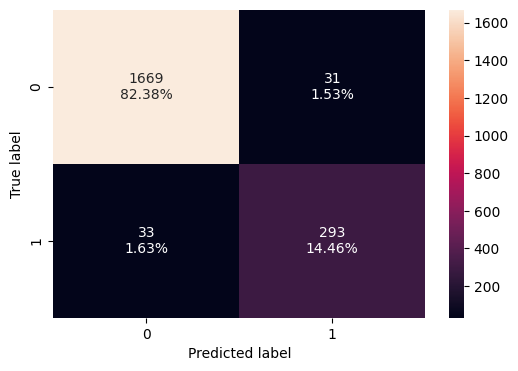

In [159]:
# Validation set
confusion_matrix_sklearn(abc_tuned, X_val, y_val)

abc_tuned_val_perf = model_performance_classification_sklearn(abc_tuned, X_val, y_val)
abc_tuned_val_perf

### Gradient Boost Classifier

In [160]:
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 310, 50),
    "subsample":[0.7,0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

acc_scorer = make_scorer(recall_score)
gbc_tuned_grid = RandomizedSearchCV(
    gbc_tuned,
    parameters,
    n_iter=50,
    scoring=acc_scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=2
)

gbc_tuned_grid = gbc_tuned_grid.fit(X_train_over, y_train_over)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [161]:
gbc_tuned = gbc_tuned_grid.best_estimator_
gbc_tuned

GradientBoostingClassifier(max_features=0.9, n_estimators=300, random_state=1,
                           subsample=0.8)

#### Model performace after tuning

Accuracy   Recall  Precision        F1
0  0.972359  0.90184   0.924528  0.913043

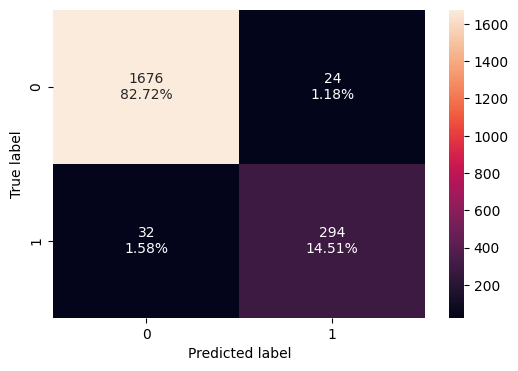

In [162]:
# Validation set
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

gbc_tuned_val_perf = model_performance_classification_sklearn(gbc_tuned, X_val, y_val)
gbc_tuned_val_perf

### XGBoost Classifier

In [163]:
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 310, 50),
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "colsample_bytree": [0.7, 0.8, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

acc_scorer = make_scorer(recall_score)

xgb_tuned_grid = RandomizedSearchCV(
    xgb_tuned,
    parameters,
    n_iter=50,
    scoring=acc_scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)

xgb_tuned_grid = xgb_tuned_grid.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [164]:
xgb_tuned = xgb_tuned_grid.best_estimator_
xgb_tuned

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

#### Model performace after tuning

Accuracy   Recall  Precision        F1
0  0.932379  0.95092   0.719258  0.819022

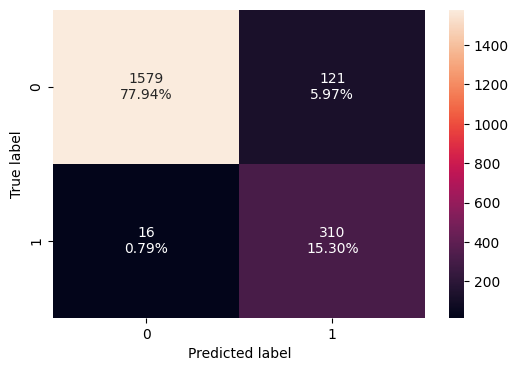

In [165]:
# Validation set
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

xgb_tuned_val_perf = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
xgb_tuned_val_perf

### Final model selection

#### Model performance comparison

In [166]:
tuned_models_val_comp_df = pd.concat(
    [
        abc_over_val_perf.T,
        abc_tuned_val_perf.T,
        gbc_over_val_perf.T,
        gbc_tuned_val_perf.T,
        xgb_over_val_perf.T,
        xgb_tuned_val_perf.T,
    ],
    axis=1,
)

tuned_models_val_comp_df.columns = [
    "Adaboost Classifier Over",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier Over",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier Over",
    "XGBoost Classifier Tuned",
]
print("Validation performance comparison after tuning:")
tuned_models_val_comp_df

Validation performance comparison after tuning:


Adaboost Classifier Over  Adaboost Classifier Tuned  \
Accuracy                   0.954590                   0.968411   
Recall                     0.886503                   0.898773   
Precision                  0.840116                   0.904321   
F1                         0.862687                   0.901538   

           Gradient Boost Classifier Over  Gradient Boost Classifier Tuned  \
Accuracy                         0.963968                         0.972359   
Recall                           0.898773                         0.901840   
Precision                        0.879880                         0.924528   
F1                               0.889226                         0.913043   

           XGBoost Classifier Over  XGBoost Classifier Tuned  
Accuracy                  0.969398                  0.932379  
Recall                    0.904908                  0.950920  
Precision                 0.904908                  0.719258  
F1                        0.904908                  0.819022

* Although the recall of the hyperparameter-tuned XGBoost classifier is high, there was too much precision reduction, so the tuned Gradient Boost classifier with the best overall performance was selected as the final model.


#### Final model performace on test set

Accuracy    Recall  Precision        F1
0  0.976802  0.932308    0.92378  0.928025

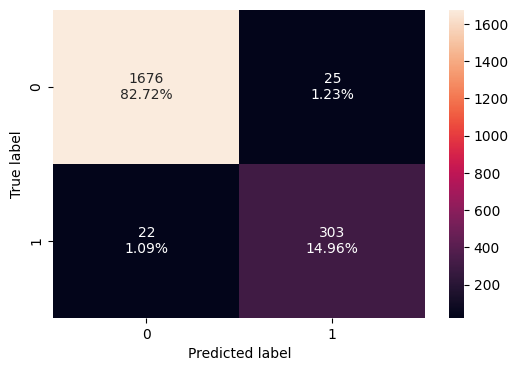

In [167]:
# Test set
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

model_performance_classification_sklearn(gbc_tuned, X_test, y_test)

* A slightly higher performance was confirmed on the test set than when tested with the validation set.

### Make Pipeline

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [169]:
def my_processing_steps(data):

    # replace missing value with "Unknown"
    data = data.fillna("Unknown")

    # replace "abc" value with "Unknown" in Income_Category column.
    data["Income_Category"] = data["Income_Category"].apply(
        lambda x: x.replace("abc", "Unknown")
    )

    # drop columns that we don't need to build a model
    data = data.drop(["CLIENTNUM", "Avg_Open_To_Buy"], axis=1,)
    # One-hot encoding
    data = pd.get_dummies(data, drop_first=True)

    return data

In [170]:
def my_outlier_treatment_steps(data):
    # IQR defining
    Q1 = data.quantile(0.25)  # finding the 25th percentile.
    Q3 = data.quantile(0.75)  # finding the 75th percentile.
    IQR = Q3 - Q1  # inter quantile range (IQR)
    lower = Q1 - 1.5 * IQR  # lower whisker
    upper = Q3 + 1.5 * IQR  # upper whisker

    columns_for_outlier_treatments = [
        "Credit_Limit",
        "Months_on_book",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Ct_Chng_Q4_Q1",
        "Total_Trans_Amt",
    ]

    for feature in columns_for_outlier_treatments:
        feature_lower = lower[feature]
        feature_upper = upper[feature]
        data[feature] = np.where(
            data[feature] > feature_upper,
            feature_upper,
            np.where(data[feature] < feature_lower, feature_lower, data[feature]),
        )  ## replacing outlier to upper/lower whiskers

    return data

####  Define FunctionTransformer 

In [171]:
processing = FunctionTransformer(my_processing_steps)
outlier_treatments = FunctionTransformer(my_outlier_treatment_steps)

#### Creat a copy of the original data

In [172]:
data_tmp = raw_data.copy()

#### Splitting the data into train and test

In [173]:
X_tmp = data_tmp.drop(columns="Attrition_Flag")
y_tmp = data_tmp["Attrition_Flag"].replace(
    {"Attrited Customer": 1, "Existing Customer": 0}
)

# Splitting the data into train and test sets
X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(
    X_tmp, y_tmp, test_size=0.30, random_state=1, stratify=y_tmp
)
print(X_train_tmp.shape, X_test_tmp.shape)

(7088, 20) (3039, 20)


#### Creating a new pipeline with the best parameters ( Gradient Boost Classifier )

In [174]:
pipe = Pipeline(
    steps=[
        ("data_processing", processing),
        ("outlier_treatments", outlier_treatments),
        (
            "GradientBoost",
            GradientBoostingClassifier(
                max_features=0.9, n_estimators=300, random_state=1, subsample=0.8
            ),
        ),
    ]
)

#  Fit the model on training data
pipe.fit(X_train_tmp, y_train_tmp)

Pipeline(steps=[('data_processing',
                 FunctionTransformer(func=<function my_processing_steps at 0x7fac50abca60>)),
                ('outlier_treatments',
                 FunctionTransformer(func=<function my_outlier_treatment_steps at 0x7fac50abf0a0>)),
                ('GradientBoost',
                 GradientBoostingClassifier(max_features=0.9, n_estimators=300,
                                            random_state=1, subsample=0.8))])

In [175]:
pipe.score(X_test_tmp, y_test_tmp)

0.9749917736097401

### Feature Importance

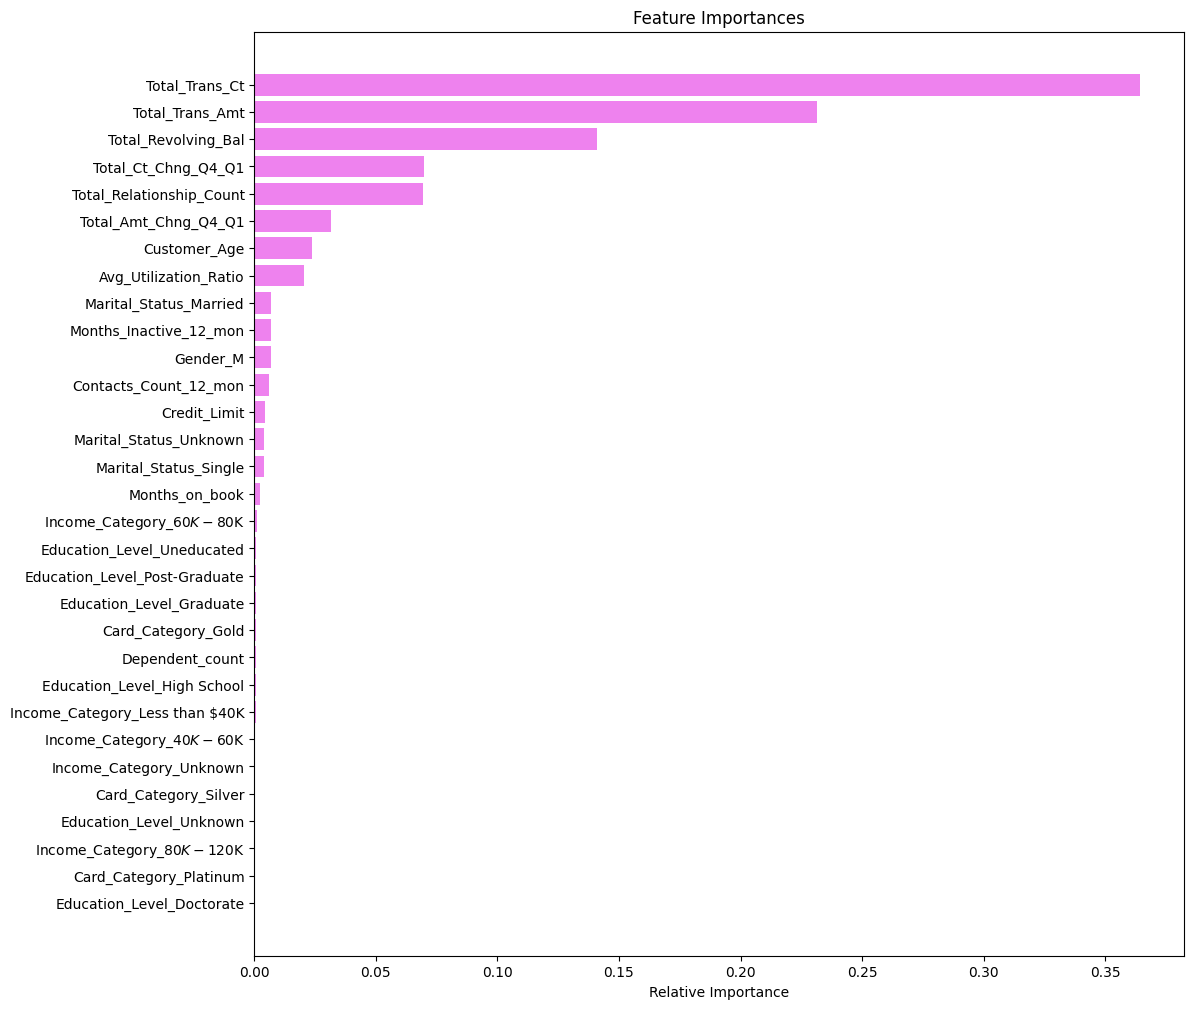

In [176]:
feature_names = X.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the final model, features `Total_Trans_Ct`, `Total_Trans_Amt`, and `Total_Revolving_Bal` are the most important factors influencing customer churn.


## Conclusion

* The churn rate is relatively high for high-income customers and customers with high-tier cards.


* As the number of products held by customers decreased, a tendency was observed to have a higher churn rate.


* The revolving balance of existing customers is relatively high.


* According to the final model, features `Total_Trans_Ct`, `Total_Trans_Amt`, and `Total_Revolving_Bal` are the most important factors influencing customer churn.


* If customer information that can distinguish the multimodal distribution of `Total_Trans_Amt` is added, it is expected that a better estimation model can be built.


* The tuned Gradient Boost Classifier trained using oversampled data showed the best overall performance with Accuracy 0.977789, Recall 0.938462 and Precision 0.924242 on the test set.


* Model training using oversampled data improves overall performance in data whose target class is imbalanced, and model training using undersampled data greatly improves recall, but at the cost of precision.


## Business Recommendations

* In order to prevent the churn rate of high-ranking cardholders and high-income customers, it should be considered to add benefits to high-ranking cards.


* It is recommended that companies actively promote their products to customers.


* By continuously monitoring the customer's card transaction volume, the company should first actively try to improve complaints for customers whose transaction volume starts to decrease.


* It is recommended to actively introduce an interest-free installment or cashback event that can actively induce customers to use their cards.


* It is recommended to expand the revolving limit according to customers' credit limit.




